# Problem Statement

Most customers do not post a review rating or any comment after purchasing a product which is a challenge for any E-commerce platform to perform If a company predicts whether a customer liked/disliked a product so that they can recommend more similar
and related products as well as they can decide whether or not a product should be sold at their end. This is crucial for E-commerce-based company because they need to keep track of each product of each seller, so that none of products discourage their customers to come shop with them again. Moreover, if a specific product has very few ratings andthat too negative,company must not drop the product straight away, may be many customers who found the product to be useful haven't actually rated it Some reasons could possibly be comparing your product review with those of your competitors beforehand, gaining lots of insight about the product and saving a lot of manual data pre-processin,maintain good customer relationship with company, lend
gifts,


offers and deals if the company feels the customer is going to break the relation. Objective of this case study is centered around predicting customer satisfaction with a product which can be deduced after predicting the product rating a user would rate after he makes a purchase.

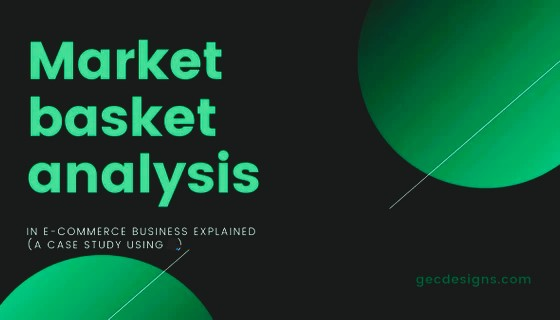

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install Pandas-datareader
!pip install sklearn
!pip install basemap



!pip install imblearn
!pip install xgboost

# import mandatory library for manipulating data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\Lenovo'

In [3]:
os.chdir('C:\\Users\\Lenovo\\Downloads')

In [4]:
import os
import zipfile
import io

zip_file = 'archive (4).zip'

with zipfile.ZipFile(zip_file,'r') as file:
      zip_file_list = file.namelist()


      olist_customer = file.read(file.namelist()[0])
      olist_geolocation =file.read(file.namelist()[1])
      olist_order_items =file.read(file.namelist()[2])
      olist_order_payment =file.read(file.namelist()[3])
      olist_order_reviews = file.read(file.namelist()[4])
      olist_orders =file.read(file.namelist()[5])
      olist_product =file.read(file.namelist()[6])
      olist_sellers = file.read(file.namelist()[7])
      olist_product_name = file.read(file.namelist()[8])
      olist_customer_df = pd.read_csv(io.BytesIO(olist_customer))
      olist_geolocation_df = pd.read_csv(io.BytesIO(olist_geolocation))
      olist_order_items_df = pd.read_csv(io.BytesIO(olist_order_items))
      olist_order_payment_df = pd.read_csv(io.BytesIO(olist_order_payment))
      olist_order_reviews_df = pd.read_csv(io.BytesIO(olist_order_reviews))
      olist_order_df = pd.read_csv(io.BytesIO(olist_orders))
      olist_product_df = pd.read_csv(io.BytesIO(olist_product))
      olist_sellers_df = pd.read_csv(io.BytesIO(olist_sellers))
      olist_product_name_df =pd.read_csv(io.BytesIO(olist_product_name))





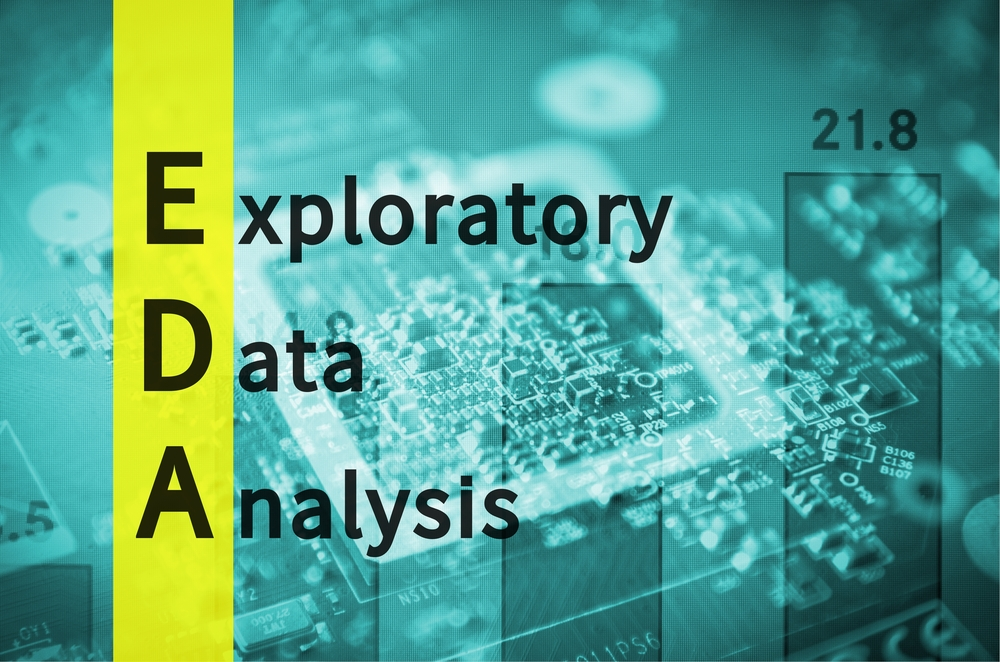








In [5]:
olist_sellers_df

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [6]:
olist_customer_df

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [7]:
olist_geolocation_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [8]:
olist_order_df

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [9]:
olist_order_reviews_df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [10]:
df = pd.merge(olist_customer_df,olist_order_df,on="customer_id" ,how ='inner')
df = df.merge(olist_order_reviews_df,on="order_id", how='inner')
df = df.merge(olist_order_items_df, on="order_id", how='inner')
df = df.merge(olist_product_df, on="product_id", how='inner')
df = df.merge(olist_order_payment_df, on="order_id", how='inner')
df = df.merge(olist_sellers_df, on='seller_id', how='inner')
df = df.merge(olist_product_name_df,on='product_category_name', how='inner')
df.shape

(115609, 40)

In [11]:
df

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
115604  e548277911829ffe81aac2b4407de701  a0abd26659c9914690cbd3320d39fd96   
115605  0fbd856ba1d4961786fb54bd448eb7fe  96328ac15f58fbb232fe14b182103382   
115606  aa0533eb31ed3be79086f11bb2bec430  a490d5875edefe9bb8f5101ec2f6b56f   
115607  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   
115608  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   

        customer_zip_code_prefix          customer_city customer_state  \
0                          14409                 franca             SP   
1                          68030               santarem             PA   
2                          68030               santarem             PA   
3                          92480        nova santa rita             RS   
4                          25931                   mage             RJ   
...                          ...                    ...            ...   
115604                     92412                 canoas             RS   
115605                     89675          vargem bonita             SC   
115606                     13870  sao joao da boa vista             SP   
115607                     30130         belo horizonte             MG   
115608                     30130         belo horizonte             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
115604  a5f8439f1e560659a492608e370ecde2    delivered   
115605  937592924b66482b823ee7ecd185d0ff    delivered   
115606  e22a3e8048469ea68906f666d446c25c    delivered   
115607  1ce0acf125f1bcd636276dd213363196    delivered   
115608  1ce0acf125f1bcd636276dd213363196    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2017-11-09 00:50:13  2017-11-10 00:47:48   
2           2017-11-09 00:50:13  2017-11-10 00:47:48   
3           2017-05-07 20:11:26  2017-05-08 22:22:56   
4           2018-02-03 19:45:40  2018-02-04 22:29:19   
...                         ...                  ...   
115604      2017-05-27 14:03:20  2017-05-27 14:15:16   
115605      2018-03-31 19:17:43  2018-03-31 19:55:18   
115606      2017-08-28 09:48:01  2017-08-28 10:05:04   
115607      2017-07-31 18:10:29  2017-07-31 18:25:20   
115608      2017-07-31 18:10:29  2017-07-31 18:25:20   

       order_delivered_carrier_date  ... product_height_cm product_width_cm  \
0               2017-05-23 10:47:57  ...              64.0             31.0   
1               2017-11-22 01:43:37  ...              64.0             31.0   
2               2017-11-22 01:43:37  ...              64.0             31.0   
3               2017-05-19 20:16:31  ...              64.0             31.0   
4               2018-02-19 18:21:47  ...              64.0             31.0   
...                             ...  ...               ...              ...   
115604          2017-05-29 09:30:43  ...              15.0             55.0   
115605          2018-04-02 19:10:46  ...              21.0             43.0   
115606          2017-08-29 11:05:28  ...              12.0             15.0   
115607          2017-08-02 18:22:30  ...               

In [12]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0


# Data Cleaning

In [13]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [14]:
df[['product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

product_weight_g  product_length_cm  product_height_cm  \
27352               NaN                NaN                NaN   

       product_width_cm  
27352               NaN

In [15]:
df.drop(27352,inplace=True)
df.reset_index(inplace =True,drop=True)

In [16]:
df.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             99700
review_comment_message           65834
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght      

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   order_id                       113193 non-null  object 
 6   order_status                   113193 non-null  object 
 7   order_purchase_timestamp       113193 non-null  object 
 8   order_approved_at              113193 non-null  object 
 9   order_delivered_carrier_date   113193 non-null  object 
 10  order_delivered_customer_date  113193 non-null  object 
 11  order_estimated_delivery_date  113193 non-null  object 
 12  review_id                     

In [18]:
df['review_comment_title'].fillna('No Review Message',inplace=True) 
df['review_comment_message'].fillna('No Review Message',inplace=True)

In [19]:
df.isnull().sum()   #after data imputing  @clean data

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [20]:
df.describe(include='all').style.background_gradient(cmap='coolwarm')

In [21]:
df.duplicated().sum() #there is no duplication in dataset

0

In [22]:
def classify_cat(x):
    categories = {
        'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
        'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
        'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
        'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
        'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art'],
        'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
        'Food & Drinks': ['food_drink', 'drinks', 'food'],
        'Books & Stationery': ['books_general_interest', 'books_technical', 'books_imported', 'stationery'],
        'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }
    
    for category, keywords in categories.items():
        if x in keywords:
            return category
    return None

df['product_category'] = df['product_category_name_english'].apply(classify_cat)

In [23]:
"""I have a dataset with 72 products, and i want to cluster them into different groups or 
 categories based on their characteristics or attributes. The categories you mentioned are Electronics, 
 Furniture, Entertainment, Beauty & Health, Home & Garden, Fashion, Books & Stationary, Industry & Construction,
 and Food & Drinks."""
df['product_category'].value_counts() 

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

In [24]:
# Create Volume Column
df['product_vol_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']
# Drop Width, Height and Length
df.drop(columns=['product_length_cm', 'product_width_cm', 'product_height_cm'],inplace= True,axis=1)

# Time series analysis

In [25]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],errors='coerce')
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'],errors = 'coerce')
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'],errors='coerce')
   

In [26]:
# Extract duration of shipping from purchasing date until delivered to customer date
df['arrival_date'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
# Extract duration of estimated shipping from purchasing date untill estimated delivery date
df['extimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
# Extract duration of shipping from purchasing carrier delivered date untill delivered to customer
df['shipping_date'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

In [27]:
# Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_date < 0]).index, inplace= True)


In [28]:
# Shipping stat  
# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'
df['seller_date_status'] = np.where((df['shipping_limit_date']-df['order_delivered_customer_date']).dt.days>=0,"on earlytime/","Late")
# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'
df["arrival_status"] = np.where((df["order_estimated_delivery_date"]-df['order_delivered_customer_date']).dt.days>=0,"on earlytime",'Late')

In [29]:
# Remove Outliers
# Create a boolean mask for the outliers
mask = (df['extimated_days'] <= 60) & (df['arrival_date'] <= 60) & (df['shipping_date'] <= 60)
# Filter the data to keep only the rows that meet the condition
data = df[mask]
# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [30]:
def rates(x):
    if x<8:
        return 'very_fast_delivery'
    elif x<16:
        return 'fast_delivery'
    elif x<25:
        return 'delivery_at_time'
    elif x<40:
        return 'slow_delivery'
    else:
        return 'very_slow_delivery'
df['extimated_delivary_rating'] = df['extimated_days'].apply(rates)  
df['shipping_delivery_rating'] = df['shipping_date'].apply(rates)
df['arrival_delivery_rating'] = df['arrival_date'].apply(rates)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113135 entries, 0 to 113134
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113135 non-null  object        
 1   customer_unique_id             113135 non-null  object        
 2   customer_zip_code_prefix       113135 non-null  int64         
 3   customer_city                  113135 non-null  object        
 4   customer_state                 113135 non-null  object        
 5   order_id                       113135 non-null  object        
 6   order_status                   113135 non-null  object        
 7   order_purchase_timestamp       113135 non-null  datetime64[ns]
 8   order_approved_at              113135 non-null  object        
 9   order_delivered_carrier_date   113135 non-null  datetime64[ns]
 10  order_delivered_customer_date  113135 non-null  datetime64[ns]
 11  

In [32]:
df.describe().T

count          mean           std      min  \
customer_zip_code_prefix    113135.0  35086.710523  29867.787030  1003.00   
review_score                113135.0      4.083148      1.345541     1.00   
order_item_id               113135.0      1.194697      0.686966     1.00   
price                       113135.0    119.868005    181.119302     0.85   
freight_value               113135.0     20.005009     15.713038     0.00   
product_name_lenght         113135.0     48.802616     10.015858     5.00   
product_description_lenght  113135.0    784.792390    650.335265     4.00   
product_photos_qty          113135.0      2.206691      1.718255     1.00   
product_weight_g            113135.0   2106.379918   3765.707531     0.00   
payment_sequential          113135.0      1.090706      0.686597     1.00   
payment_installments        113135.0      2.943369      2.779020     0.00   
payment_value               113135.0    171.555897    264.257516     0.00   
seller_zip_code_prefix      113135.0  24528.465470  27650.860674  1001.00   
product_vol_cm3             113135.0  15306.795713  23412.104680   168.00   
arrival_date                113135.0     11.979626      9.362979     0.00   
extimated_days              113135.0     23.469855      8.825454     2.00   
shipping_date               113135.0      8.721280      8.537984     0.00   

                                 25%       50%       75%        max  
customer_zip_code_prefix    11310.00  24315.00  58882.00   99980.00  
review_score                    4.00      5.00      5.00       5.00  
order_item_id                   1.00      1.00      1.00      21.00  
price                          39.90     74.90    133.00    6735.00  
freight_value                  13.08     16.32     21.19     409.68  
product_name_lenght            42.00     52.00     57.00      76.00  
product_description_lenght    346.00    600.00    982.00    3992.00  
product_photos_qty              1.00      1.00      3.00      20.00  
product_weight_g              300.00    700.00   1800.00   40425.00  
payment_sequential              1.00      1.00      1.00      26.00  
payment_installments            1.00      2.00      4.00      24.00  
payment_value                  60.85    107.94    189.08   13664.08  
seller_zip_code_prefix       6429.00  13660.00  28605.00   99730.00  
product_vol_cm3              2856.00   6612.00  18480.00  296208.00  
arrival_date                    6.00     10.00     15.00     208.00  
extimated_days                 18.00     23.00     28.00     155.00  
shipping_date                   4.00      7.00     11.00     205.00

In [33]:
df['review_comment_message'].unique().sum()

'No Review MessageGOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUITO DO PRODUTO.Produto compatível com seu valor, muito bonito e barato, simples, mas um bom custo benefício. Entregou antes do prazoOs encaixes para o encosto da cadeira estavam desalinhados. Deu trabalho pra encaixar e finalmente montar o produto.Bom dia! \r\nEstou insatisfeita com a segunda compra, pois era para ser entregue até 27/04/2017 e até o momento não a recebi. Já terminei de pagar e a mercadoria não me foi entregue.A entrega é muito demorada. Uma cadeira veio faltando a parte do encosto.A entrega foi no prazo e a venda ocorreu muito bem. A qualidade desse produto e que deixou a desejar. PRODUTO ENTREGUE COM AVARIA, SOLICITADO TROCA.tudo como encomendadoProduto bom em conforme com o preço o produto chegou certinho, porém não veio os parafusos e presilhas para realizar a montagem. Eu tive que comprar à parte para terminar a montagem.Ótima loja recomendoO mocho não tem nem 6 meses de uso e a parte da estrutura já est

# Data Visualization

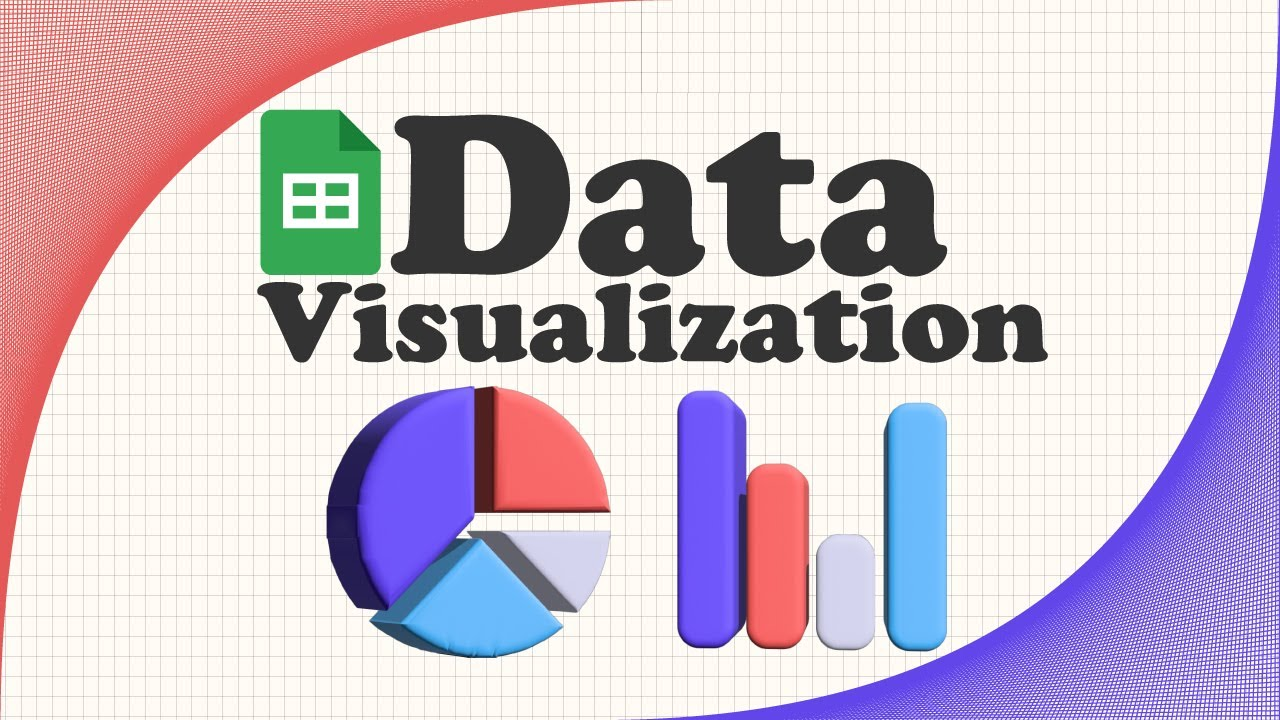width="500"/>

array([[<Axes: title={'center': 'customer_zip_code_prefix'}>,
        <Axes: title={'center': 'order_purchase_timestamp'}>,
        <Axes: title={'center': 'order_delivered_carrier_date'}>,
        <Axes: title={'center': 'order_delivered_customer_date'}>,
        <Axes: title={'center': 'order_estimated_delivery_date'}>],
       [<Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'shipping_limit_date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'product_name_lenght'}>,
        <Axes: title={'center': 'product_description_lenght'}>,
        <Axes: title={'center': 'product_photos_qty'}>,
        <Axes: title={'center': 'product_weight_g'}>,
        <Axes: title={'center': 'payment_sequential'}>],
       [<Axes: title={'center': 'payment_installments'}>,
        <Axes: title={'center': 'payment_value'}>,
        <Axes: title={'ce

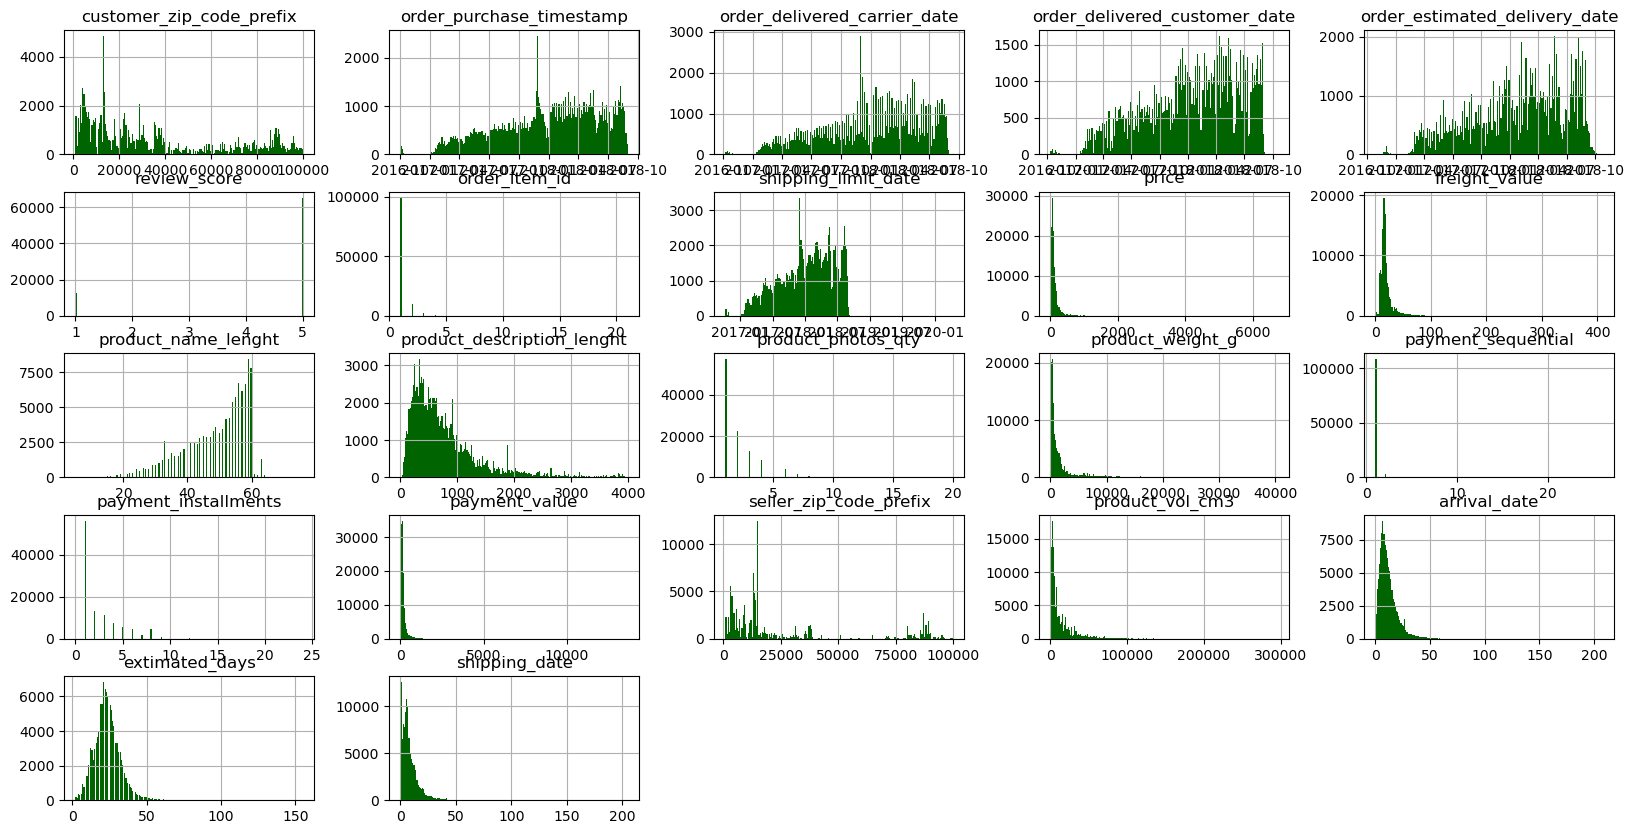

In [34]:
df.hist(bins=200,figsize=[20,10],color='darkgreen')

In [35]:
integer_columns = df.select_dtypes(include=['int64'])
integer_columns.columns

Index(['customer_zip_code_prefix', 'review_score', 'order_item_id',
       'payment_sequential', 'payment_installments', 'seller_zip_code_prefix',
       'arrival_date', 'extimated_days', 'shipping_date'],
      dtype='object')

In [36]:
numeric_data = df.corr()
numeric_data.columns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4916\3416079628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_data = df.corr()


Index(['customer_zip_code_prefix', 'review_score', 'order_item_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days', 'shipping_date'],
      dtype='object')

In [37]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

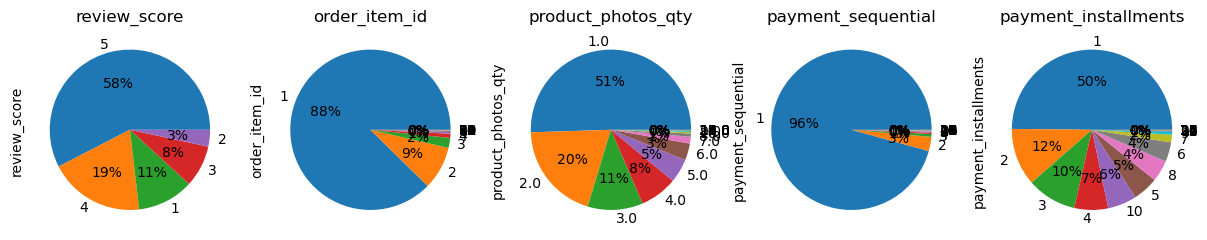

In [38]:
pie_plot(df,['review_score', 'order_item_id',
       'product_photos_qty',  'payment_sequential',
       'payment_installments'],1,5)

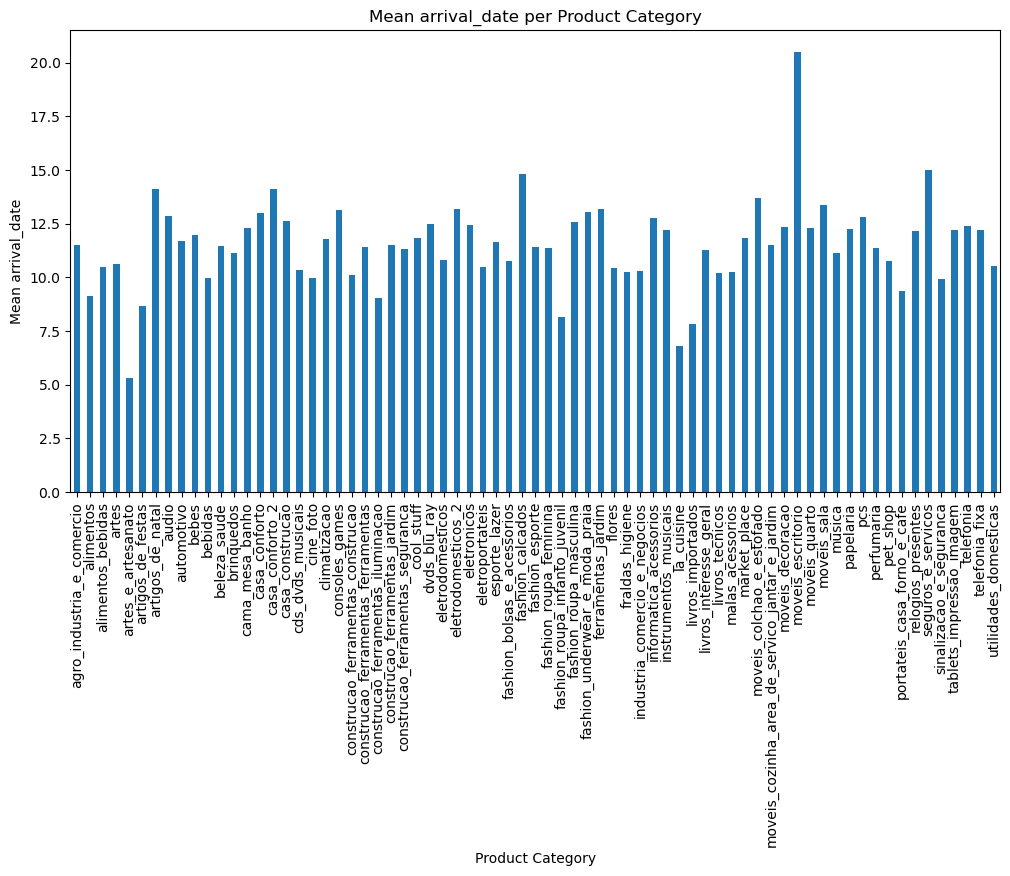

In [39]:
category_mean_diff = df.groupby('product_category_name')['arrival_date'].mean()

# Create a bar plot
category_mean_diff.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product Category')
plt.ylabel('Mean arrival_date')
plt.title('Mean arrival_date per Product Category')
plt.xticks(rotation=90) 
plt.show()

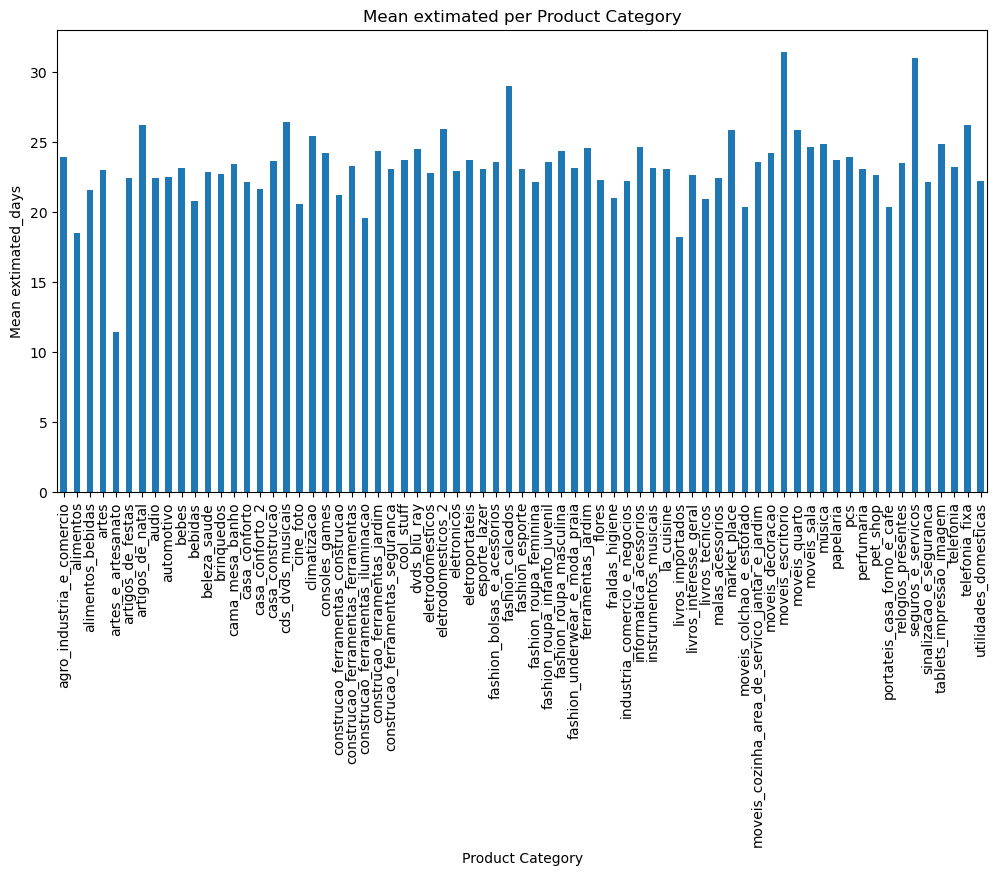

In [40]:
category_mean_diff = df.groupby('product_category_name')['extimated_days'].mean()

# Create a bar plot
category_mean_diff.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product Category')
plt.ylabel('Mean extimated_days')
plt.title('Mean extimated per Product Category')
plt.xticks(rotation=90) 
plt.show()

In [41]:
def scatter_features(l):
    g = sns.PairGrid(df,y_vars='review_score',x_vars=df[l].columns, height=5)
    g.map(plt.scatter,color='darkgreen',alpha=0.2)
    plt.show()
    

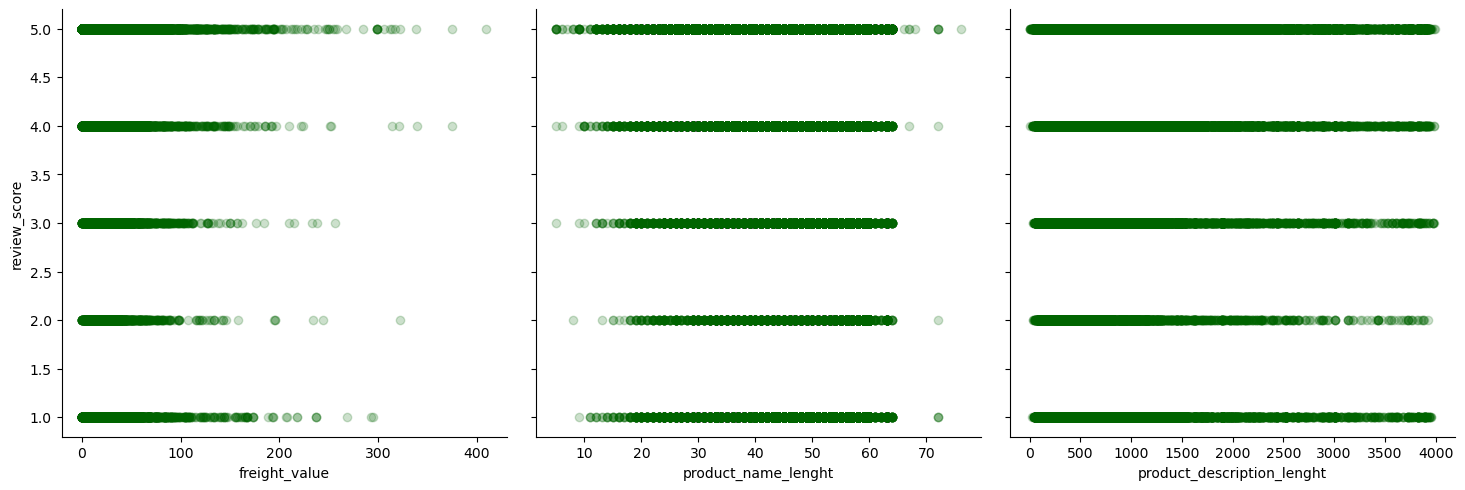

In [42]:
scatter_features(['freight_value', 'product_name_lenght', 'product_description_lenght'])

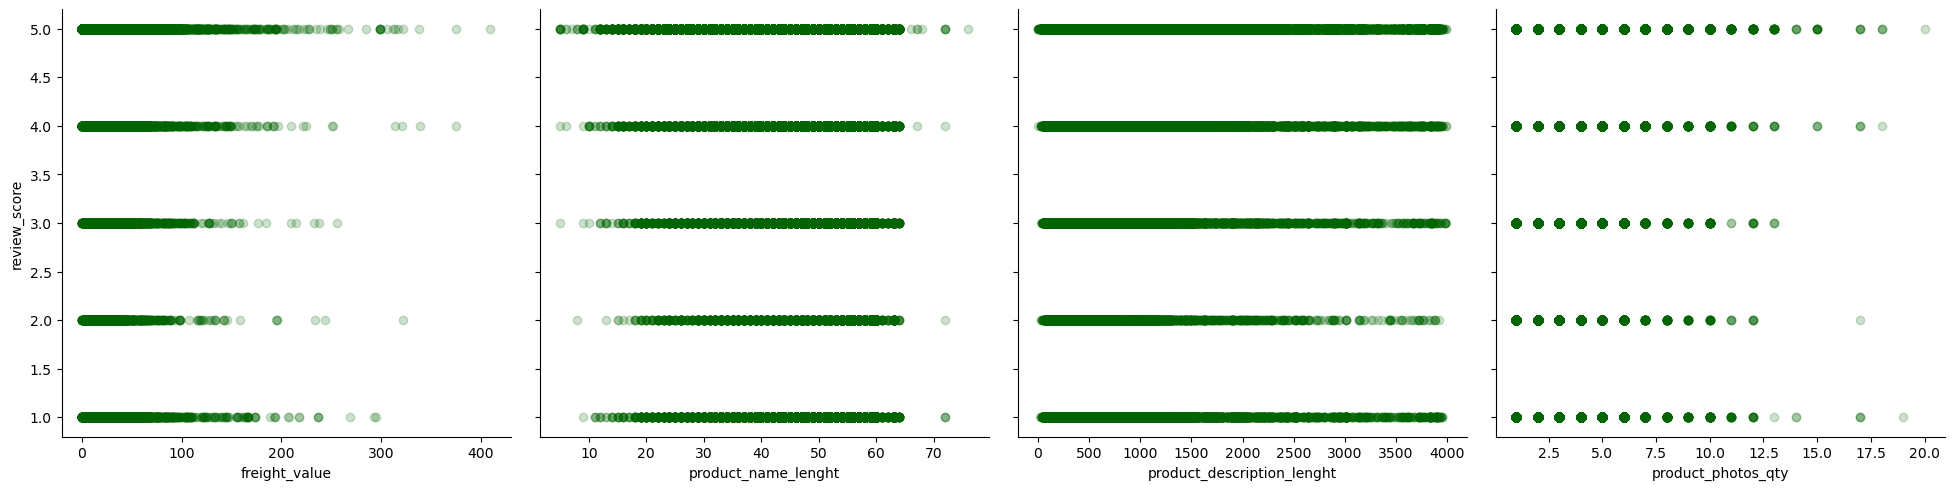

In [43]:
scatter_features(['freight_value', 'product_name_lenght', 'product_description_lenght','product_photos_qty'])

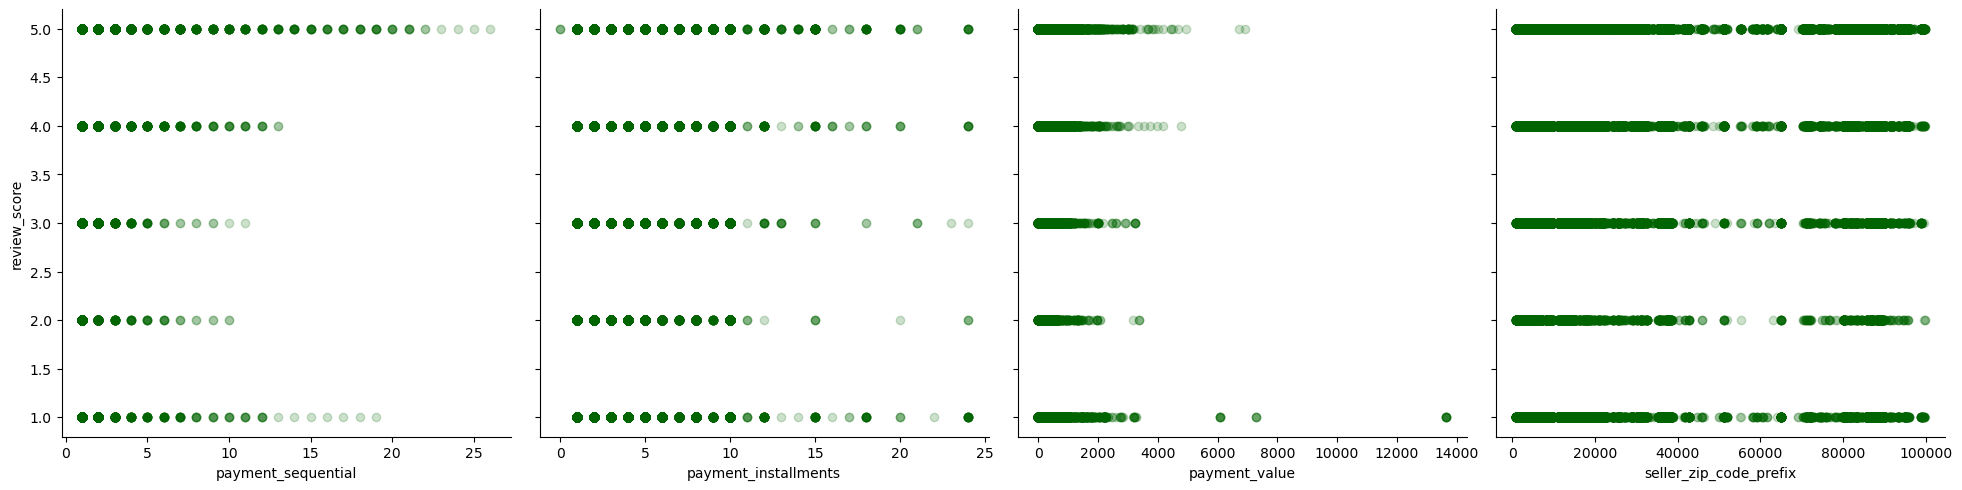

In [44]:
scatter_features([ 'payment_sequential', 'payment_installments', 'payment_value', 'seller_zip_code_prefix'])

Text(0.5, 1.0, 'Top 10 Customers Capacity Cities')

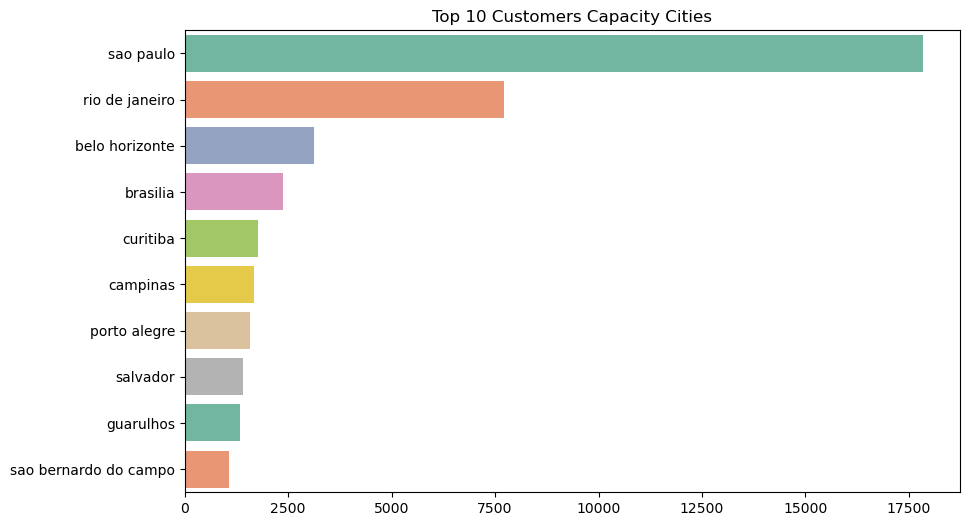

In [45]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['customer_city'].value_counts().values[:10], y = data['customer_city'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Customers Capacity Cities')


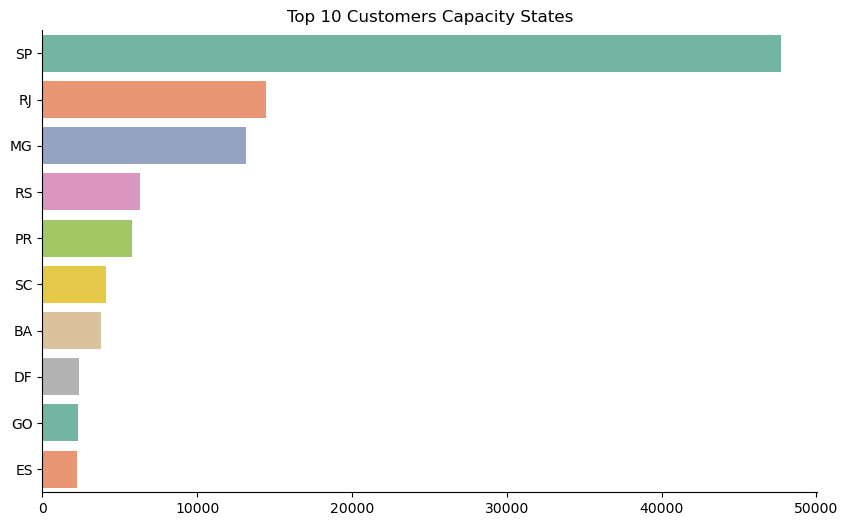

In [46]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['customer_state'].value_counts().values[:10], y = data['customer_state'].value_counts().index[:10], palette= 'Set2')
plt.title('Top 10 Customers Capacity States')
sns.despine()

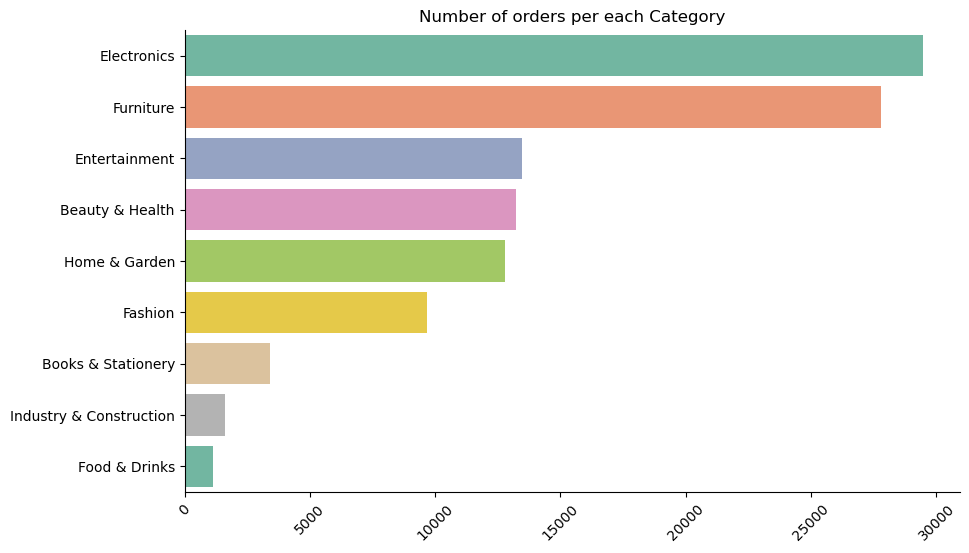

In [47]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['product_category'].value_counts().values, y = data['product_category'].value_counts().index, palette= 'Set2')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4916\3566753908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['review_score'])


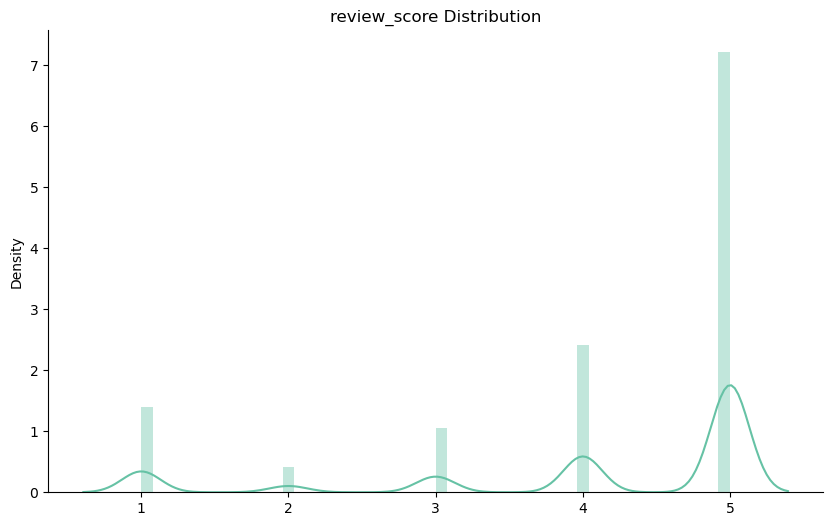

In [48]:
plt.figure(figsize=[10,6])
sns.set_palette('Set2')
sns.distplot(x = data['review_score'])
plt.title('review_score Distribution')
sns.despine()

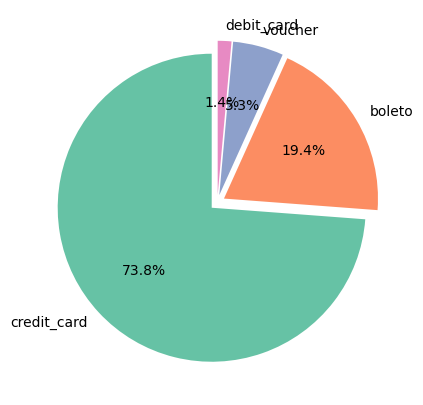

In [49]:
plt.figure(figsize=[5,5])
plt.pie(df['payment_type'].value_counts().values,
        explode=(0.05, 0.05, 0.05, 0.05),
        labels= data['payment_type'].value_counts().index,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90
       );

In [50]:
df['payment_installments'].value_counts()

1     56374
2     13149
3     11313
4      7690
10     6631
5      5808
8      4873
6      4450
7      1735
9       692
12      161
15       88
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [51]:
data[data['payment_installments'] == 0]

customer_id                customer_unique_id  \
29113  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
29114  48ebb06cf56dba9d009230cc751bb195  9925e1d7dff0d807355599dee04830ab   
96733  5e5794daaa13f73e2f1cdb4114529843  f54cea27c80dc09bfe07b1cf1e01b845   

       customer_zip_code_prefix     customer_city customer_state  \
29113                     44001  feira de santana             BA   
29114                     44001  feira de santana             BA   
96733                      5263         sao paulo             SP   

                               order_id order_status order_purchase_timestamp  \
29113  1a57108394169c0b47d8f876acc9ba2d    delivered      2018-05-15 16:25:14   
29114  1a57108394169c0b47d8f876acc9ba2d    delivered      2018-05-15 16:25:14   
96733  744bade1fcf9ff3f31d860ace076d422    delivered      2018-04-22 11:34:42   

         order_approved_at order_delivered_carrier_date  ...     seller_city  \
29113  2018-05-15 16:36:52          2018-05-17 12:37:00  ...  belo horizonte   
29114  2018-05-15 16:36:52          2018-05-17 12:37:00  ...  belo horizonte   
96733  2018-04-24 19:04:46          2018-04-24 03:14:34  ...          franca   

      seller_state product_category_name_english  product_category  \
29113           MG                    housewares     Home & Garden   
29114           MG                    housewares     Home & Garden   
96733           SP                     telephony       Electronics   

      product_vol_cm3 arrival_date extimated_days shipping_date  \
29113          5819.0            8             21             7   
29114          5819.0            8             21             7   
96733          1560.0            5             23             3   

       seller_date_status arrival_status  
29113                Late   on earlytime  
29114                Late   on earlytime  
96733                Late   on earlytime  

[3 rows x 44 columns]

In [52]:
# Drop indices
df.drop([29113, 29114, 96733], inplace=True)
# Reset Index
df.reset_index(inplace= True, drop= True) 

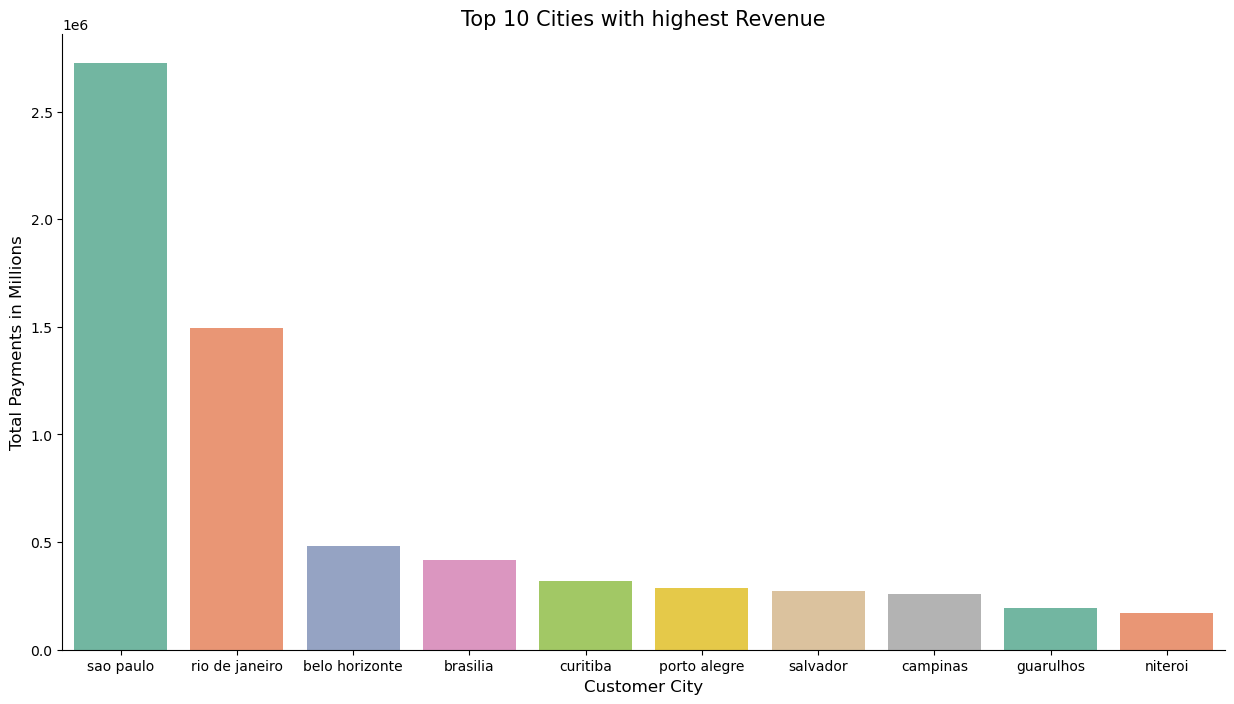

In [53]:
# Group customer city by payment value
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)
# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'Set2')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

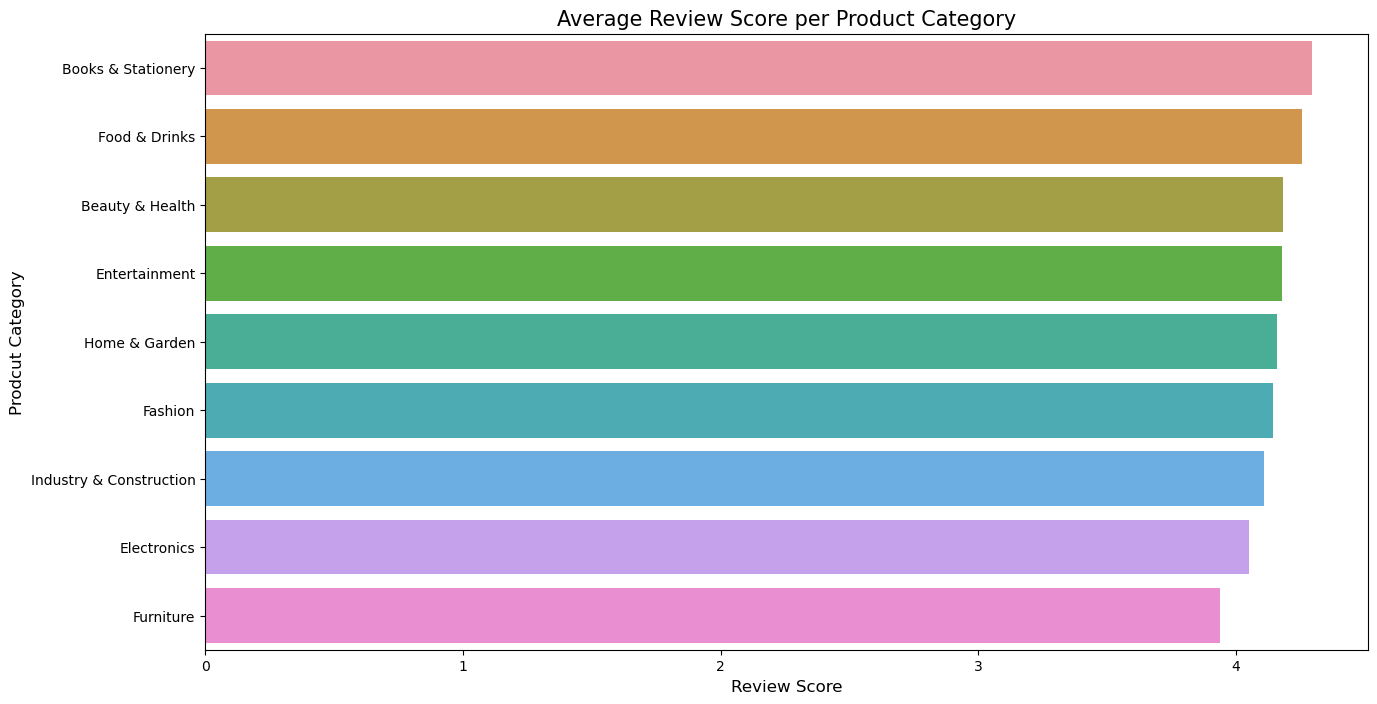

In [54]:
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)
# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= None)
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()

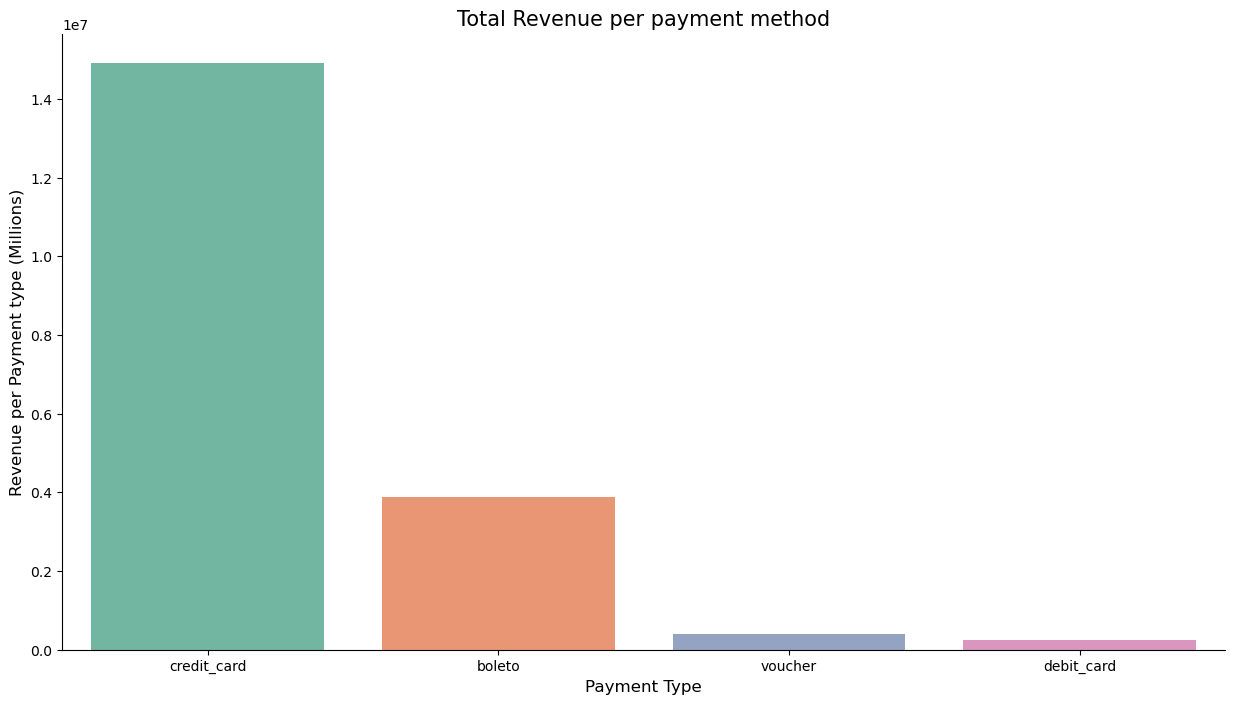

In [55]:
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)
# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= None)
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

In [56]:
olist_geolocation_df

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

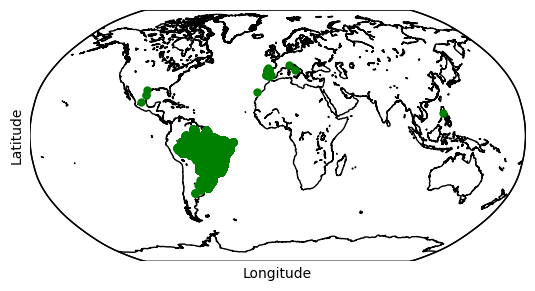

In [57]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin',lon_0=0,resolution='l')
m.drawcoastlines()
m.drawmapboundary()
lon, lat = olist_geolocation_df['geolocation_lng'].to_numpy(),olist_geolocation_df['geolocation_lat'].to_numpy()
x, y = m(lon, lat)
m.plot(x, y,'o', markersize=5, color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [58]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df[l], palette="flare")

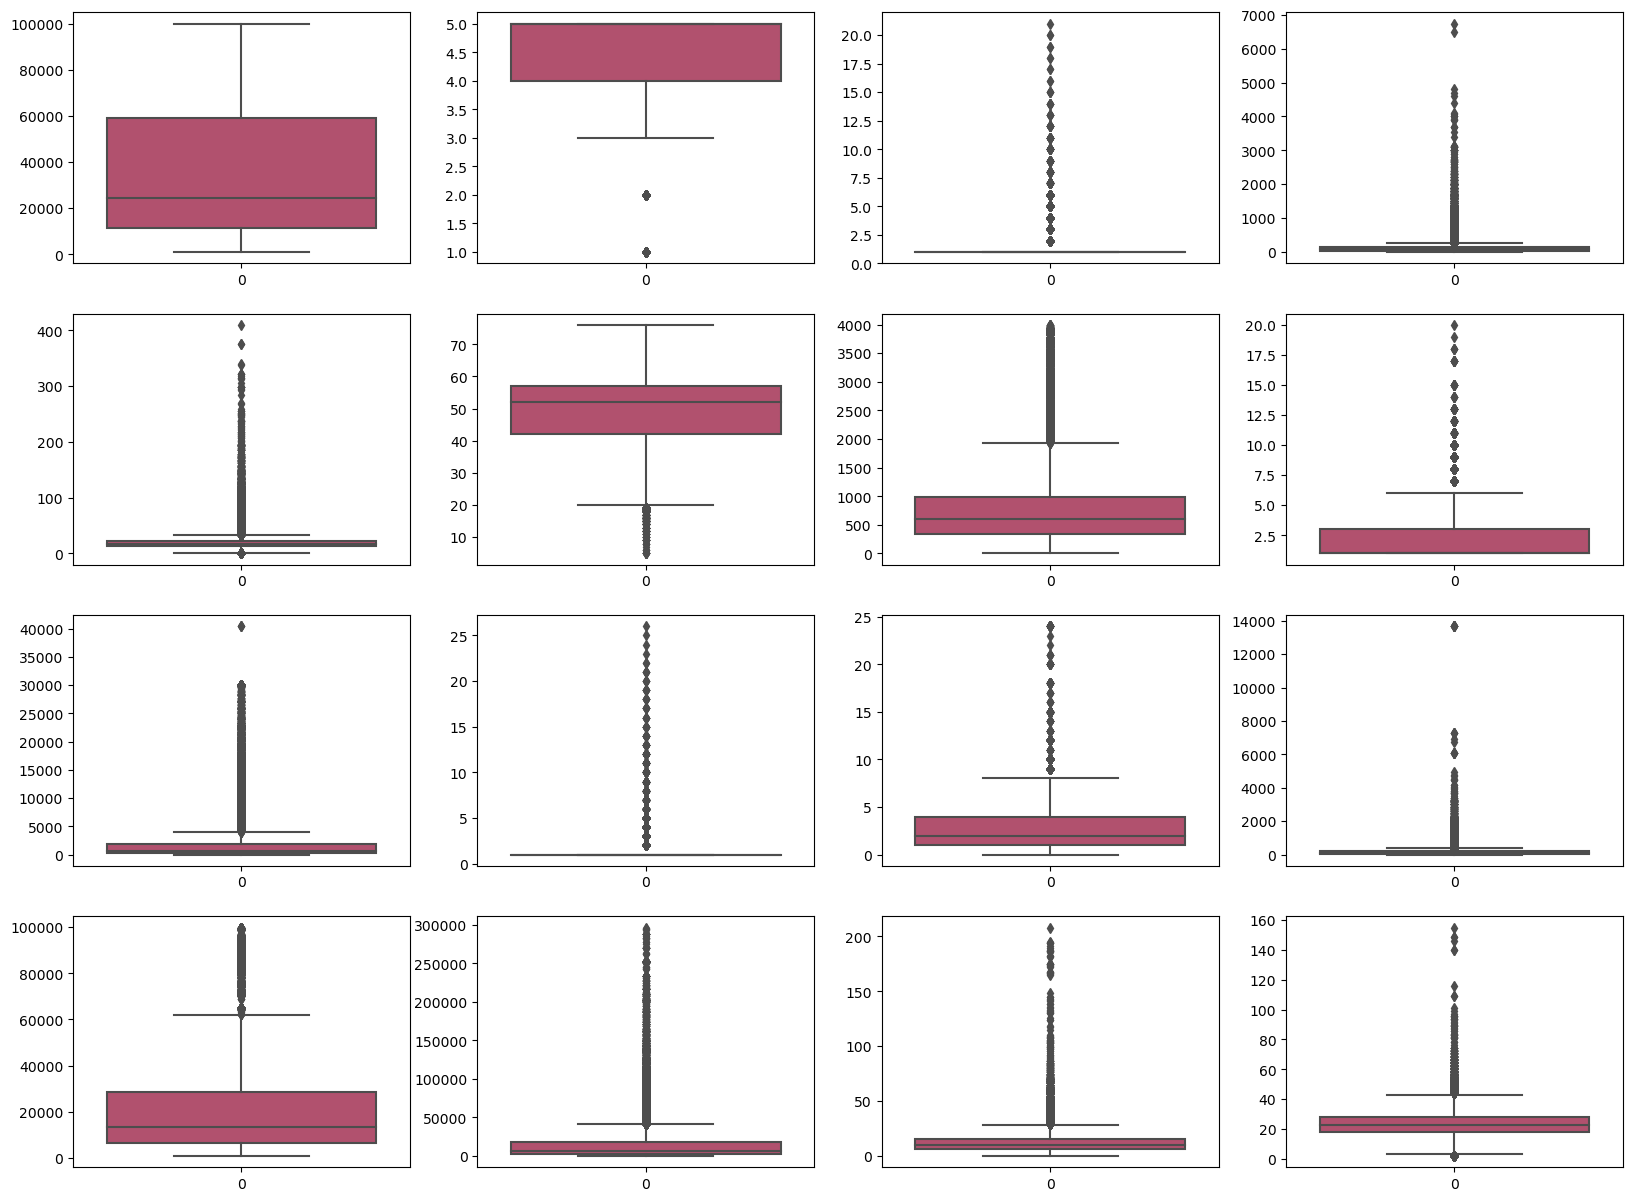

In [59]:
box_plot(['customer_zip_code_prefix', 'review_score', 'order_item_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days'])

# Univariate,Bivariate and MultiVariate Analysis

In [60]:
df_5=df.loc[df['review_score']==5]
df_4=df.loc[df['review_score']==4]
df_3=df.loc[df['review_score']==3]
df_2=df.loc[df['review_score']==2]
df_4=df.loc[df['review_score']==1]
df_5.shape



(65130, 47)

In [61]:
df_3.shape

(9526, 47)

In [62]:
sns.FacetGrid(df,hue="review_score").map(plt.scatter,"price","product_photos_qty").add_legend();
plt.show()



# Data Transforming

In [63]:
df1 = df.copy()

In [64]:
df1.drop(columns=['customer_id','customer_unique_id',
                  'order_id','review_id','order_item_id','product_id','seller_id'],inplace=True
       ,axis=1)

In [65]:
!pip install category_encoders


Defaulting to user installation because normal site-packages is not writeable


In [66]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
ce_t= ce.TargetEncoder()
le = LabelEncoder()

In [67]:
df1 = pd.get_dummies(df1,columns=['order_status','seller_date_status','arrival_status'])

In [68]:
df1['customer_city'] = ce_t.fit_transform(df1['customer_city'],df1['review_score']) 
df1['review_comment_title'] = ce_t.fit_transform(df1['review_comment_title'],df1['review_score'])
df1['review_comment_message'] = ce_t.fit_transform(df1['review_comment_message'],df1['review_score'])
df1['product_category_name_english'] = ce_t.fit_transform(df1['product_category_name_english'],df1['review_score'])
df1['product_category'] = ce_t.fit_transform(df1['product_category'],df1['review_score'])                                                                                 




In [69]:
df1['payment_type'] = le.fit_transform(df1['payment_type'])
df1['customer_state'] = le.fit_transform(df1['customer_state'])
df1['seller_city'] = le.fit_transform(df1['seller_city'])
df1['seller_state'] = le.fit_transform(df1['seller_state'])
df1['extimated_delivary_rating'] = le.fit_transform(df1['extimated_delivary_rating'])
df1['shipping_delivery_rating'] =le.fit_transform(df1['shipping_delivery_rating'])
df1['arrival_delivery_rating'] = le.fit_transform(df1['arrival_delivery_rating'])

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113132 entries, 0 to 113131
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   customer_zip_code_prefix          113132 non-null  int64         
 1   customer_city                     113132 non-null  float64       
 2   customer_state                    113132 non-null  int32         
 3   order_purchase_timestamp          113132 non-null  datetime64[ns]
 4   order_approved_at                 113132 non-null  object        
 5   order_delivered_carrier_date      113132 non-null  datetime64[ns]
 6   order_delivered_customer_date     113132 non-null  datetime64[ns]
 7   order_estimated_delivery_date     113132 non-null  datetime64[ns]
 8   review_score                      113132 non-null  int64         
 9   review_comment_title              113132 non-null  float64       
 10  review_comment_message          

In [71]:
dc = df1.iloc[:,[0,1,2,8,9,10,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

In [72]:
dc.describe(include='all').T

count          mean           std  \
customer_zip_code_prefix          113132.0  35087.209410  29868.011467   
customer_city                     113132.0      4.077087      0.183960   
customer_state                    113132.0     18.695674      7.065919   
review_score                      113132.0      4.083133      1.345553   
review_comment_title              113132.0      4.117601      0.213291   
review_comment_message            113132.0      4.247838      0.255100   
price                             113132.0    119.868710    181.121101   
freight_value                     113132.0     20.005158     15.713177   
product_name_lenght               113132.0     48.802814     10.015810   
product_description_lenght        113132.0    784.797909    650.342308   
product_photos_qty                113132.0      2.206697      1.718277   
product_weight_g                  113132.0   2106.419864   3765.749470   
payment_sequential                113132.0      1.090691      0.686596   
payment_type                      113132.0      0.926122      0.644899   
payment_installments              113132.0      2.943420      2.779038   
payment_value                     113132.0    171.558657    264.260243   
seller_zip_code_prefix            113132.0  24528.209004  27650.479938   
seller_city                       113132.0    345.747286    159.028144   
seller_state                      113132.0     18.452984      4.829543   
product_category_name_english     113132.0      4.083091      0.131803   
product_category                  113132.0      4.083133      0.102377   
product_vol_cm3                   113132.0  15307.152539  23412.311917   
arrival_date                      113132.0     11.979767      9.363025   
extimated_days                    113132.0     23.469849      8.825290   
shipping_date                     113132.0      8.721440      8.538018   
extimated_delivary_rating         113132.0      1.116386      1.111670   
shipping_delivery_rating          113132.0      2.130944      1.114536   
arrival_delivery_rating           113132.0      1.654059      1.161831   
order_status_canceled             113132.0      0.000062      0.007866   
order_status_delivered            113132.0      0.999938      0.007866   
seller_date_status_Late           113132.0      0.791385      0.406320   
seller_date_status_on earlytime/  113132.0      0.208615      0.406320   
arrival_status_Late               113132.0      0.077025      0.266632   
arrival_status_on earlytime       113132.0      0.922975      0.266632   

                                          min           25%           50%  \
customer_zip_code_prefix          1003.000000  11310.000000  24315.000000   
customer_city                        2.627912      3.959514      4.110879   
customer_state                       0.000000     12.000000     22.000000   
review_score                         1.000000      4.000000      5.000000   
review_comment_title                 1.224105      4.108331      4.108331   
review_comment_message               1.987392      4.202425      4.398872   
price                                0.850000     39.900000     74.900000   
freight_value                        0.000000     13.080000     16.320000   
product_name_lenght                  5.000000     42.000000     52.000000   
product_description_lenght           4.000000    346.000000    600.000000   
product_photos_qty                   1.000000      1.000000      1.000000   
product_weight_g                     0.000000    300.000000    700.000000   
payment_sequential                   1.000000      1.000000      1.000000   
payment_type                         0.000000      1.000000      1.000000   
payment_installments                 0.000000      1.000000      2.000000   
payment_value                        0.000000     60.850000    107.940000   
seller_zip_code_prefix            1001.000000   6429.000000  13660.000000   
seller_city                          0.000000    219.000000 

In [73]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113132 entries, 0 to 113131
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   customer_zip_code_prefix          113132 non-null  int64  
 1   customer_city                     113132 non-null  float64
 2   customer_state                    113132 non-null  int32  
 3   review_score                      113132 non-null  int64  
 4   review_comment_title              113132 non-null  float64
 5   review_comment_message            113132 non-null  float64
 6   price                             113132 non-null  float64
 7   freight_value                     113132 non-null  float64
 8   product_name_lenght               113132 non-null  float64
 9   product_description_lenght        113132 non-null  float64
 10  product_photos_qty                113132 non-null  float64
 11  product_weight_g                  113132 non-null  f

In [74]:
label_counts = dc['review_score'].value_counts()
print(label_counts)

5    65130
4    21802
1    12851
3     9526
2     3823
Name: review_score, dtype: int64


In [75]:
dc_corr = dc.corr()
plt.figure(figsize=(32,16))
sns.heatmap(dc_corr,annot=True,cmap='GnBu')
plt.show()

# Data Normalization

In [76]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn import preprocessing

In [77]:
ds = dc[['price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days']].copy()

In [78]:
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(ds)
robust = pd.DataFrame(robust)
robust


0         1         2         3    4         5    6         7   \
0       0.538024  0.685573 -0.733333  0.850629  0.0  5.322000  0.0  0.000000   
1       0.409130  1.057953 -0.733333  0.850629  0.0  5.322000  0.0 -0.333333   
2       0.409130  1.057953 -0.733333  0.850629  0.0  5.322000  0.0 -0.333333   
3       0.538024 -0.086313 -0.733333  0.850629  0.0  5.322000  0.0  1.666667   
4       0.344683  1.759556 -0.733333  0.850629  0.0  5.322000  0.0  2.666667   
...          ...       ...       ...       ...  ...       ...  ...       ...   
113127  1.268528  2.819975 -0.066667 -0.578616  0.0  5.400000  0.0  2.666667   
113128  3.373792  2.636252  0.466667 -0.496855  0.5  7.866667  0.0  2.000000   
113129  0.688507  0.633785  0.466667  0.205975  0.0  1.000000  0.0  0.333333   
113130  0.581096  1.215783  0.333333 -0.268868  0.0  1.333333  0.0  0.000000   
113131  0.581096  1.215783  0.333333 -0.268868  0.0  1.333333  1.0 -0.333333   

              8         9         10        11   12  
0       0.303589 -0.229212  6.433948 -0.222222 -0.4  
1       1.308951 -0.229212  6.433948  0.888889  1.6  
2       1.308951 -0.229212  6.433948  0.888889  1.6  
3       0.254772 -0.229212  6.433948  0.888889  1.2  
4       0.231143 -0.229212  6.433948  1.666667  2.3  
...          ...       ...       ...       ...  ...  
113127  0.968943  3.428977  2.480991 -0.444444  0.1  
113128  2.485797  3.428977  4.373848 -0.444444 -0.6  
113129  0.409569  3.428977  0.544547 -0.222222 -0.2  
113130 -0.411440  3.428977  1.100102 -0.111111  0.4  
113131 -0.061919  3.428977  1.100102 -0.111111  0.4  

[113132 rows x 13 columns]

In [79]:
scaler_m  = preprocessing.MinMaxScaler()
min_max = scaler_m.fit_transform(ds)
min_max = pd.DataFrame(min_max)
min_max

0         1         2         3         4         5     6   \
0       0.018434  0.053408  0.507042  0.285105  0.000000  0.214793  0.00   
1       0.016652  0.060779  0.507042  0.285105  0.000000  0.214793  0.00   
2       0.016652  0.060779  0.507042  0.285105  0.000000  0.214793  0.00   
3       0.018434  0.038127  0.507042  0.285105  0.000000  0.214793  0.00   
4       0.015761  0.074668  0.507042  0.285105  0.000000  0.214793  0.00   
...          ...       ...       ...       ...       ...       ...   ...   
113127  0.028534  0.095660  0.647887  0.057172  0.000000  0.217687  0.00   
113128  0.057639  0.092023  0.760563  0.070211  0.052632  0.309215  0.00   
113129  0.020515  0.052382  0.760563  0.182297  0.000000  0.054422  0.00   
113130  0.019030  0.063904  0.732394  0.106570  0.000000  0.066790  0.00   
113131  0.019030  0.063904  0.732394  0.106570  0.000000  0.066790  0.04   

              7         8         9         10        11        12  
0       0.083333  0.010749  0.076735  0.361330  0.038462  0.111111  
1       0.041667  0.020184  0.076735  0.361330  0.086538  0.241830  
2       0.041667  0.020184  0.076735  0.361330  0.086538  0.241830  
3       0.291667  0.010290  0.076735  0.361330  0.086538  0.215686  
4       0.416667  0.010069  0.076735  0.361330  0.120192  0.287582  
...          ...       ...       ...       ...       ...       ...  
113127  0.416667  0.016993  0.898419  0.152706  0.028846  0.143791  
113128  0.333333  0.031228  0.898419  0.252604  0.028846  0.098039  
113129  0.125000  0.011743  0.898419  0.050507  0.038462  0.124183  
113130  0.083333  0.004038  0.898419  0.079827  0.043269  0.163399  
113131  0.041667  0.007318  0.898419  0.079827  0.043269  0.163399  

[113132 rows x 13 columns]

In [80]:
scaler_s = preprocessing.StandardScaler()
standard= scaler_s.fit_transform(ds)
standard = pd.DataFrame(standard)
standard

0         1         2         3         4         5         6   \
0       0.028276  0.119317 -0.779053  0.547717 -0.702274  1.746428 -0.132088   
1      -0.037979  0.311513 -0.779053  0.547717 -0.702274  1.746428 -0.132088   
2      -0.037979  0.311513 -0.779053  0.547717 -0.702274  1.746428 -0.132088   
3       0.028276 -0.279076 -0.779053  0.547717 -0.702274  1.746428 -0.132088   
4      -0.071106  0.673631 -0.779053  0.547717 -0.702274  1.746428 -0.132088   
...          ...       ...       ...       ...       ...       ...       ...   
113127  0.403772  1.220945  0.219373 -0.850014 -0.702274  1.777497 -0.132088   
113128  1.485926  1.126120  1.018113 -0.770056 -0.120293  2.760042 -0.132088   
113129  0.105628  0.092588  1.018113 -0.082723 -0.702274  0.024850 -0.132088   
113130  0.050416  0.392974  0.818428 -0.547096 -0.702274  0.157627 -0.132088   
113131  0.050416  0.392974  0.818428 -0.547096 -0.702274  0.157627  1.324380   

              7         8         9         10        11        12  
0      -0.339479 -0.093426 -0.576890  3.922263 -0.425053 -0.506484  
1      -0.699317  0.394429 -0.576890  3.922263  0.642982  1.759740  
2      -0.699317  0.394429 -0.576890  3.922263  0.642982  1.759740  
3       1.459713 -0.117115 -0.576890  3.922263  0.642982  1.306495  
4       2.539228 -0.128581 -0.576890  3.922263  1.390607  2.552919  
...          ...       ...       ...       ...       ...       ...  
113127  2.539228  0.229439  2.357032  1.284281 -0.638660  0.060072  
113128  1.819551  0.965497  2.357032  2.547468 -0.638660 -0.733107  
113129  0.020360 -0.041999  2.357032 -0.007994 -0.425053 -0.279862  
113130 -0.339479 -0.440396  2.357032  0.362753 -0.318250  0.400006  
113131 -0.699317 -0.270790  2.357032  0.362753 -0.318250  0.400006  

[113132 rows x 13 columns]

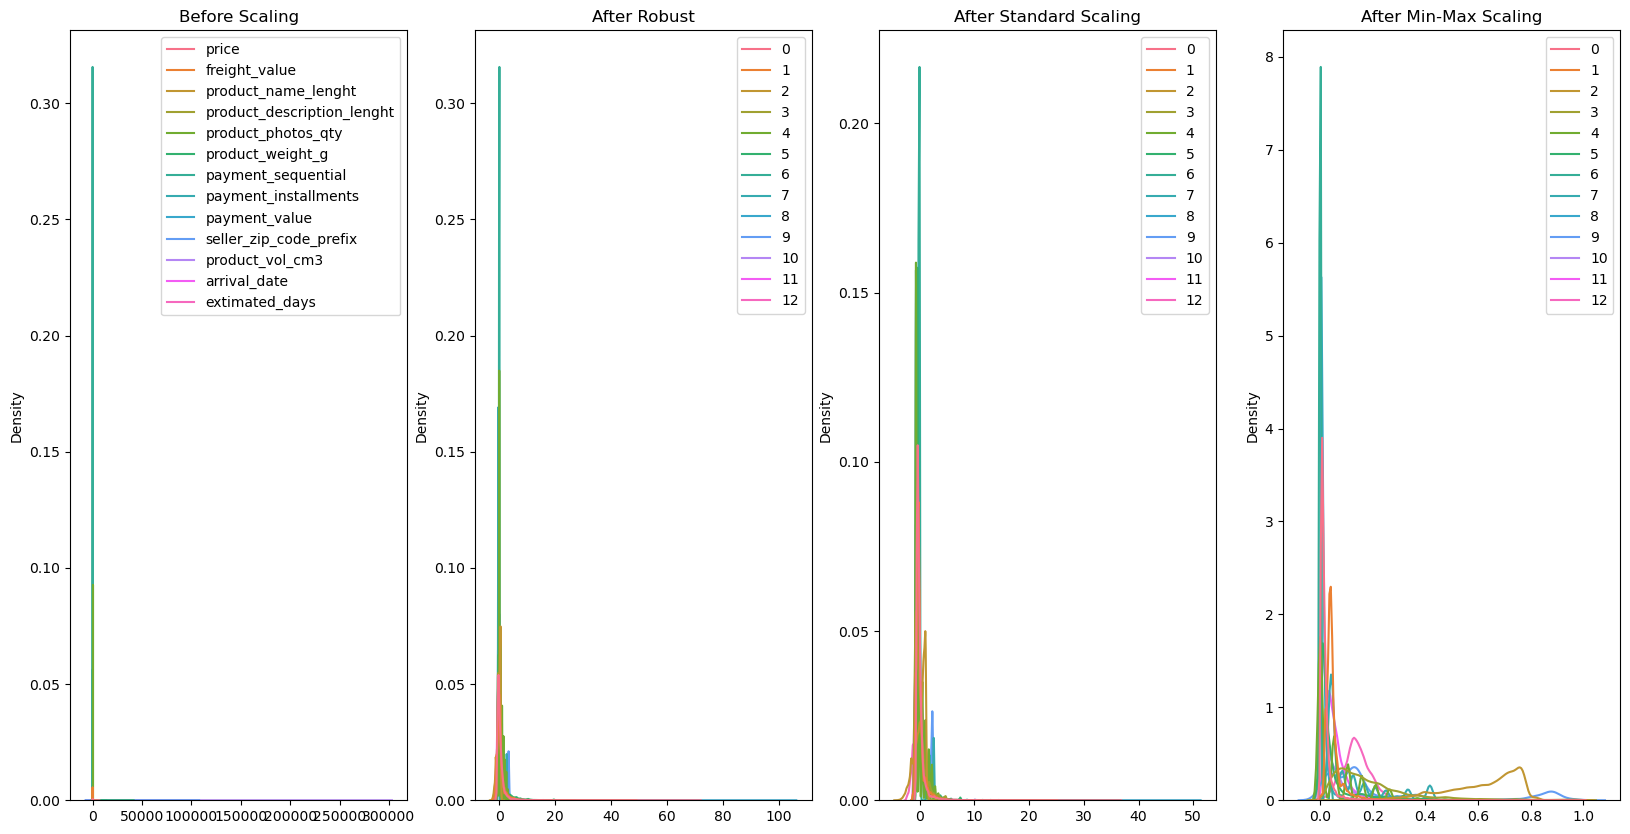

In [81]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(ds, ax = ax1, color ='b')
ax2.set_title('After Robust')

sns.kdeplot(robust, ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard, ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(min_max, ax = ax4, color ='g')
plt.show()

In [82]:
def min_maxScaling(df_num, cols):
    scaler = preprocessing.MinMaxScaler()
    min_max = scaler_s.fit_transform(ds)
    min_max = pd.DataFrame(min_max, columns =cols)
    return min_max

In [83]:
min_max_s = min_maxScaling(ds,['price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days'])

In [84]:
clean_ds = dc.copy()
clean_ds.drop(labels=['price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days'],axis=1,inplace=True)
clean_ds[['price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days']]=min_max_s[['price','freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'product_vol_cm3', 'arrival_date', 'extimated_days']]

In [85]:
clean_ds

customer_zip_code_prefix  customer_city  customer_state  review_score  \
0                          14409       3.968037              25             4   
1                          68030       3.108082              13             1   
2                          68030       3.108082              13             1   
3                          92480       4.157114              22             3   
4                          25931       4.021740              18             4   
...                          ...            ...             ...           ...   
113127                     92412       4.039370              22             5   
113128                     89675       4.198565              23             4   
113129                     13870       4.290183              25             5   
113130                     30130       4.089923              10             5   
113131                     30130       4.089923              10             5   

        review_comment_title  review_comment_message  payment_type  \
0                   4.108331                4.398872             1   
1                   4.108331                3.645787             1   
2                   4.108331                3.645787             1   
3                   4.108331                3.942208             1   
4                   4.108331                4.142266             1   
...                      ...                     ...           ...   
113127              4.108331                4.250393             1   
113128              4.108331                4.398872             1   
113129              4.108331                4.398872             1   
113130              4.108331                4.799067             1   
113131              4.108331                4.799067             3   

        seller_city  seller_state  product_category_name_english  ...  \
0               249            21                       3.553520  ...   
1               249            21                       3.553520  ...   
2               249            21                       3.553520  ...   
3               249            21                       3.553520  ...   
4               249            21                       3.553520  ...   
...             ...           ...                            ...  ...   
113127          137            19                       4.102086  ...   
113128          137            19                       4.102086  ...   
113129          137            19                       4.102086  ...   
113130          137            19                       4.102086  ...   
113131          137            19                       4.102086  ...   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                         0.547717           -0.702274          1.746428   
1                         0.547717           -0.702274          1.746428   
2                         0.547717           -0.702274          1.746428   
3                         0.547717           -0.702274          1.746428   
4                         0.547717           -0.702274          1.746428   
...                            ...                 ...               ...   
113127                   -0.850014           -0.702274          1.777497   
113128                   -0.770056           -0.120293          2.760042   
113129                   -0.082723           -0.702274          0.024850   
113130                   -0.547096           -0.702274          0.157627   
113131                   -0.547096           -0.702274          0.157627   

        payment_sequential  payment_installments  payment_value  \
0                -0.132088             -0.339479      -0.093426   
1                -0.132088             -0.699317       0.394429   
2                -0.132088             -0.699317       0.394429   
3                -0.132088              1.459713      -0.117115   
4                -0.132088              2.539228      -0.128581   
..

In [86]:
clean_ds.drop(['review_score'],axis=1,inplace= True)

In [87]:
y = dc.iloc[:,[3]]
y[1:10]

review_score
1             1
2             1
3             3
4             4
5             4
6             4
7             2
8             3
9             2

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [89]:
test = SelectKBest()

In [90]:
fit = test.fit(clean_ds,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print(fit.scores_)

[2.36988774e+01 1.05441195e+03 6.95333854e+01 2.31096145e+03
 2.83356126e+04 3.07768811e+00 4.18858642e+00 2.51274265e+01
 2.94413990e+02 1.77102936e+02 2.25294178e+03 1.43369726e+01
 2.18797260e+02 1.64198831e+02 3.95340770e+00 3.95340769e+00
 2.40695607e+02 2.40695607e+02 3.79525838e+03 3.79525838e+03
 1.19533613e+01 3.27807934e+01 1.34155728e+01 1.22002059e+01
 1.96991112e+01 2.17418133e+01 5.37514978e+00 7.32944865e+01
 2.29714218e+02 2.34572533e+01 1.78827543e+01 2.94774501e+03
 1.10219561e+02]


In [92]:
importances_df = pd.DataFrame({'Feature': clean_ds.columns, 'Importance': fit.scores_})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importances_df['Feature'], importances_df['Importance'] , color = 'Maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
p_reduced = pca.fit_transform(clean_ds)
p_reduced = pd.DataFrame(p_reduced)

In [94]:
print("Number of original features is {} and of reduced features is {}".format(clean_ds.shape[1], p_reduced.shape[1]))

Number of original features is 33 and of reduced features is 7


In [95]:
x_reduced = clean_ds.iloc[:,[1,3,4,8,10,11,12,13,16,18,19,28,31]]

# Modeling
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix,classification_report
import warnings
%timeit



In [97]:
x_train,x_test,y_train,y_test = train_test_split(clean_ds,y,test_size=0.2,random_state=9)
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(p_reduced,y,test_size=0.2,random_state=9)
x_train_x,x_test_x,y_train_x,y_test_x = train_test_split(x_reduced,y,test_size=0.2,random_state=9)

In [98]:
def evaluvation_matrics(evals,model,name,x_test,y_test):
    report = classification_report(y_test,model.predict(x_test),zero_division=1, labels=[0,1,2,3,4], target_names=['5_star','4_star','1_star','3_star','2_star'])
    accuracy_scor = accuracy_score(model.predict(x_test),y_test)
    print(report)
    print("accuracy_score=",accuracy_scor*100)

In [99]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(7,5))
    plt.plot(df[:33])
    plt.legend(['Actual' , 'Predicted'])

In [100]:
def conf_matrixs(y_test,model,x_test,cmap,normalize=None,plot=True,encoded_labels=True):
    y_pred = model.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred,normalize=None,labels=[0,1,2,3,4])   
    ax = sns.heatmap(conf_mat, cmap=cmap, square=True, cbar=False, annot=True, fmt='g')
    ax.set_title('confution_matrics')
    ax.set_xlabel('prediction')
    ax.set_ylabel('Actual')
    return conf_mat

In [101]:
import timeit

In [102]:
%timeit

# KNeighborsClassifier

In [103]:
k = 5
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
model_k = KNeighborsClassifier(n_neighbors=k,weights='uniform',p=2)
model_k.fit(x_train,y_train)
evaluvation_matrics("clean_ds",model_k,"KNeighborsClassifier",x_test,y_test)



              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.33      0.29      0.31      2566
      1_star       0.25      0.14      0.18       767
      3_star       0.24      0.16      0.19      1895
      2_star       0.29      0.24      0.26      4321

   micro avg       0.29      0.23      0.25      9549
   macro avg       0.42      0.37      0.39      9549
weighted avg       0.28      0.23      0.25      9549

accuracy_score= 52.03959870950634


array([[   0,    0,    0,    0,    0],
       [   0,  749,   42,  123,  368],
       [   0,   92,  111,   46,  110],
       [   0,  182,   27,  297,  303],
       [   0,  338,   67,  196, 1016]], dtype=int64)

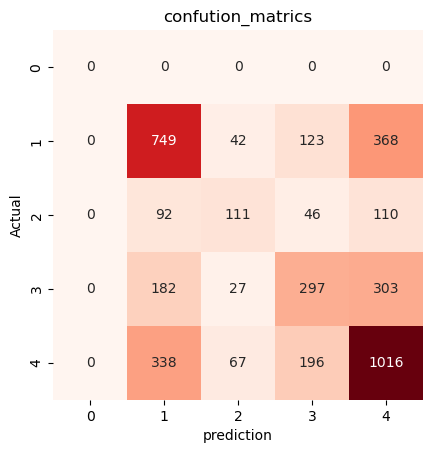

In [104]:
conf_matrixs(y_test,model_k,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)



In [105]:
k = 5
y_train_p = y_train_p.values.ravel()
y_test_p = y_test_p.values.ravel()
model_kp= KNeighborsClassifier(n_neighbors=k,weights='uniform',p=2)
model_kp.fit(x_train_p,y_train_p)
evaluvation_matrics("PCA",model_kp,"KNeighborsClassifier",x_test_p,y_test_p)



              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.32      0.29      0.31      2566
      1_star       0.24      0.14      0.17       767
      3_star       0.24      0.16      0.19      1895
      2_star       0.28      0.23      0.26      4321

   micro avg       0.28      0.23      0.25      9549
   macro avg       0.42      0.36      0.38      9549
weighted avg       0.28      0.23      0.25      9549

accuracy_score= 51.79652627392054


array([[   0,    0,    0,    0,    0],
       [   0,  750,   43,  123,  375],
       [   0,   94,  104,   48,  109],
       [   0,  185,   25,  296,  305],
       [   0,  358,   69,  196, 1014]], dtype=int64)

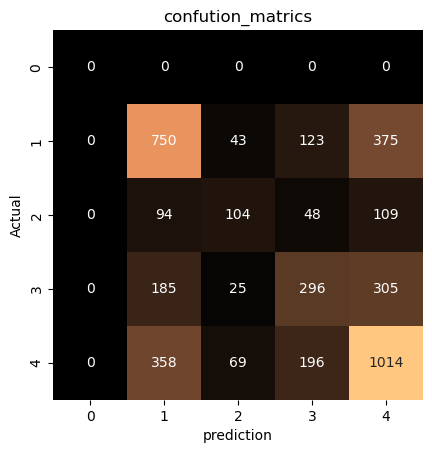

In [106]:
conf_matrixs(y_test_p,model_kp,x_test_p,cmap='copper',normalize=None,plot=True,encoded_labels=True)


In [107]:
k = 5
y_train_x = y_train_x.values.ravel()
y_test_x = y_test_x.values.ravel()
model_kx= KNeighborsClassifier(n_neighbors=k,weights='uniform',p=2)
model_kx.fit(x_train_x,y_train_x)
evaluvation_matrics("selectK",model_kx,"KNeighborsClassifier",x_test_x,y_test_x)


              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.74      0.79      0.77      2566
      1_star       0.42      0.24      0.30       767
      3_star       0.43      0.29      0.34      1895
      2_star       0.39      0.30      0.34      4321

   micro avg       0.52      0.42      0.47      9549
   macro avg       0.59      0.52      0.55      9549
weighted avg       0.49      0.42      0.45      9549

accuracy_score= 66.57533035753745


In [108]:
conf_matrixs(y_test_x,model_kx,x_test_x,cmap=None,normalize=None,plot=True,encoded_labels=True)

array([[   0,    0,    0,    0,    0],
       [   0, 2035,  129,   80,   99],
       [   0,  290,  182,   75,   67],
       [   0,  142,   66,  544,  370],
       [   0,  104,   23,  228, 1283]], dtype=int64)

In [109]:
plot_predictions(model_kx,x_test_x,y_test_x)

# Desition tree

In [110]:
#In clean_ds
model_d = DecisionTreeClassifier().fit(x_train,y_train)
evaluvation_matrics("clean_ds",model_d,"desition_tree",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.87      0.88      0.87      2566
      1_star       0.72      0.76      0.74       767
      3_star       0.55      0.56      0.55      1895
      2_star       0.53      0.54      0.53      4321

   micro avg       0.64      0.66      0.65      9549
   macro avg       0.73      0.75      0.74      9549
weighted avg       0.64      0.66      0.65      9549

accuracy_score= 73.85424492862509


In [111]:
conf_matrixs(y_test,model_d,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

array([[   0,    0,    0,    0,    0],
       [   0, 2253,   38,   38,   82],
       [   0,   27,  583,   24,   55],
       [   0,   45,   17, 1069,  246],
       [   0,   79,   51,  246, 2353]], dtype=int64)

In [112]:
#after PCA
model_dp = DecisionTreeClassifier().fit(x_train_p,y_train_p)
evaluvation_matrics("p_reduced",model_dp,"desition_tree",x_test_p,y_test_p)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.45      0.48      0.47      2566
      1_star       0.30      0.33      0.31       767
      3_star       0.26      0.28      0.27      1895
      2_star       0.34      0.35      0.34      4321

   micro avg       0.35      0.37      0.36      9549
   macro avg       0.47      0.49      0.48      9549
weighted avg       0.35      0.37      0.36      9549

accuracy_score= 53.922305210589116


array([[   0,    0,    0,    0,    0],
       [   0, 1236,   97,  184,  320],
       [   0,   95,  252,   56,  101],
       [   0,  171,   53,  538,  320],
       [   0,  349,  104,  316, 1516]], dtype=int64)

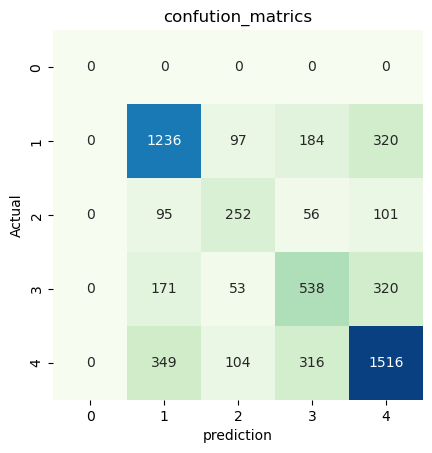

In [113]:
conf_matrixs(y_test_p,model_dp,x_test_p,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)

In [114]:
#after selectKBest
model_dx = DecisionTreeClassifier().fit(x_train_x,y_train_x)
evaluvation_matrics("x_reduced",model_dx,"desition_tree",x_test_x,y_test_x)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.86      0.88      0.87      2566
      1_star       0.69      0.75      0.72       767
      3_star       0.55      0.57      0.56      1895
      2_star       0.54      0.55      0.54      4321

   micro avg       0.64      0.66      0.65      9549
   macro avg       0.73      0.75      0.74      9549
weighted avg       0.64      0.66      0.65      9549

accuracy_score= 74.04428337826491


array([[   0,    0,    0,    0,    0],
       [   0, 2267,   38,   57,   68],
       [   0,   31,  578,   35,   38],
       [   0,   47,   30, 1084,  233],
       [   0,   88,   50,  232, 2368]], dtype=int64)

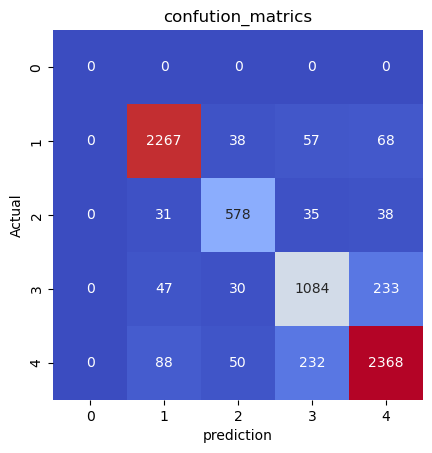

In [115]:
conf_matrixs(y_test_x,model_dx,x_test_x,cmap='coolwarm',plot=True,encoded_labels=True)

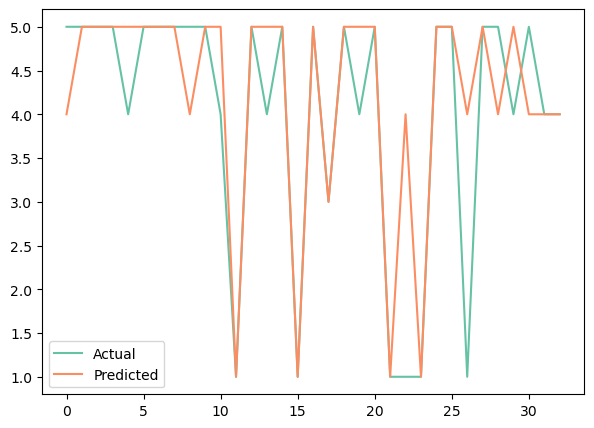

In [116]:
plot_predictions(model_dx,x_test_x,y_test_x)

# RandomForestClassifier

In [117]:
model_r = RandomForestClassifier(n_estimators=1000,criterion='entropy',n_jobs=10,random_state=47)
model_r.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=10,
                       random_state=47)

In [118]:
evaluvation_matrics("clean_ds",model_r,"random forest",x_test,y_test)


              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.95      0.90      0.92      2566
      1_star       0.99      0.75      0.85       767
      3_star       0.97      0.51      0.67      1895
      2_star       0.94      0.41      0.57      4321

   micro avg       0.95      0.59      0.73      9549
   macro avg       0.97      0.71      0.80      9549
weighted avg       0.95      0.59      0.71      9549

accuracy_score= 82.10544924205595


array([[   0,    0,    0,    0,    0],
       [   0, 2317,    3,    7,    9],
       [   0,   32,  574,    5,    3],
       [   0,   26,    2,  963,   32],
       [   0,   26,    1,    8, 1758]], dtype=int64)

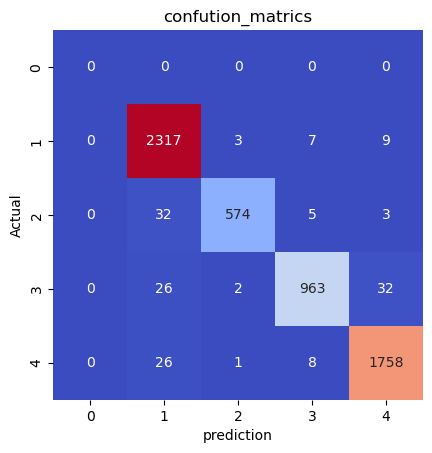

In [119]:
conf_matrixs(y_test,model_r,x_test,cmap='coolwarm',plot=True,encoded_labels=True)


In [120]:
model_rp =  RandomForestClassifier(n_estimators=100)
model_rp.fit(x_train_p,y_train_p)


RandomForestClassifier()

In [121]:
evaluvation_matrics("p_reduced",model_rp,"desition_tree",x_test_p,y_test_p)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.75      0.51      0.61      2566
      1_star       0.90      0.31      0.46       767
      3_star       0.74      0.22      0.34      1895
      2_star       0.58      0.23      0.33      4321

   micro avg       0.69      0.31      0.43      9549
   macro avg       0.80      0.45      0.55      9549
weighted avg       0.69      0.31      0.42      9549

accuracy_score= 67.5520395987095


array([[   0,    0,    0,    0,    0],
       [   0, 1315,    3,   23,   81],
       [   0,   78,  235,    8,   33],
       [   0,  101,    3,  418,  104],
       [   0,   80,    3,   47,  986]], dtype=int64)

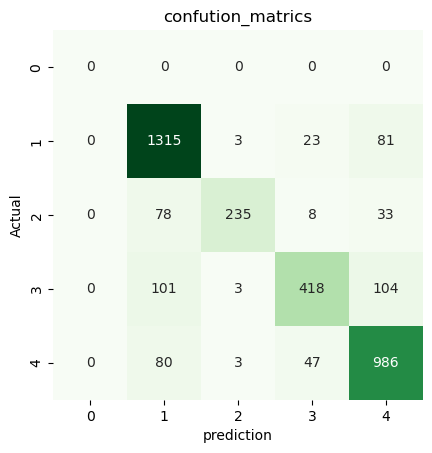

In [122]:
conf_matrixs(y_test_p,model_rp,x_test_p,cmap='Greens',plot=True,encoded_labels=True)

In [123]:
model_rx =  RandomForestClassifier(n_estimators=100)


In [124]:
model_rx.fit(x_train_x,y_train_x)

RandomForestClassifier()

In [125]:
evaluvation_matrics("p_reduced",model_rx,"randam_frorest",x_test_x,y_test_x)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.93      0.91      0.92      2566
      1_star       0.97      0.75      0.85       767
      3_star       0.90      0.53      0.66      1895
      2_star       0.77      0.45      0.57      4321

   micro avg       0.87      0.61      0.72      9549
   macro avg       0.91      0.73      0.80      9549
weighted avg       0.86      0.61      0.71      9549

accuracy_score= 81.2348079727759


array([[   0,    0,    0,    0,    0],
       [   0, 2332,    7,   15,   30],
       [   0,   32,  576,   12,   19],
       [   0,   30,    3,  995,  109],
       [   0,   37,    3,   28, 1957]], dtype=int64)

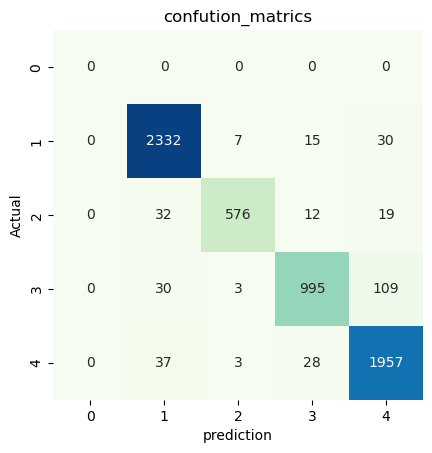

In [126]:
conf_matrixs(y_test_x,model_rx,x_test_x,cmap='GnBu',plot=True,encoded_labels=True)

# Support Vector Machine

In [129]:
model_s= SVC(kernel='sigmoid')


In [130]:
model_s.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [131]:
evaluvation_matrics("p_reduced",model_s,"SVM",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.15      0.21      0.18      2566
      1_star       1.00      0.00      0.00       767
      3_star       0.08      0.24      0.12      1895
      2_star       1.00      0.00      0.00      4321

   micro avg       0.11      0.10      0.11      9549
   macro avg       0.65      0.29      0.26      9549
weighted avg       0.59      0.10      0.07      9549

accuracy_score= 38.77668272417908


array([[   0,    0,    0,    0,    0],
       [   0,  541,    0,  580,    0],
       [   0,  139,    0,  187,    0],
       [   0,  314,    0,  449,    0],
       [   0,  581,    0, 1075,    0]], dtype=int64)

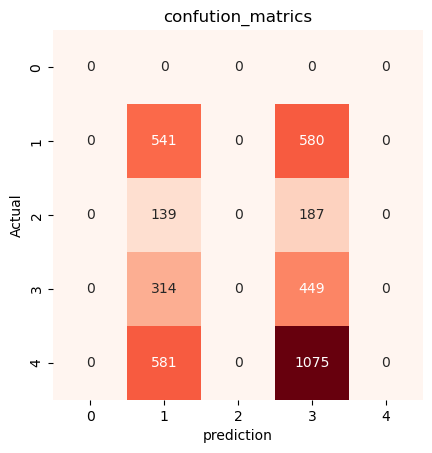

In [132]:
conf_matrixs(y_test,model_s,x_test,cmap='Reds',plot=True,encoded_labels=True)

In [134]:
model_sp = SVC(kernel='sigmoid')
model_sp.fit(x_train_p,y_train_p)

SVC(kernel='sigmoid')

array([[   0,    0,    0,    0,    0],
       [   0,  633,    0,    0,    0],
       [   0,  188,    0,    0,    0],
       [   0,  475,    0,    0,    0],
       [   0, 1165,    0,    0,    0]], dtype=int64)

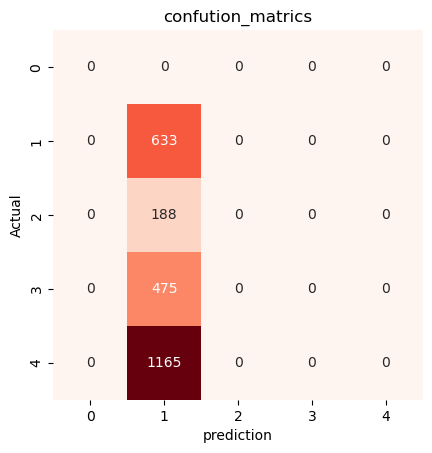

In [135]:
conf_matrixs(y_test_p,model_sp,x_test_p,cmap='Reds',plot=True,encoded_labels=True)

In [136]:
evaluvation_matrics("p_reduced",model_sp,"SVM",x_test_p,y_test_p)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.11      0.25      0.15      2566
      1_star       1.00      0.00      0.00       767
      3_star       1.00      0.00      0.00      1895
      2_star       1.00      0.00      0.00      4321

   micro avg       0.11      0.07      0.08      9549
   macro avg       0.82      0.25      0.23      9549
weighted avg       0.76      0.07      0.04      9549

accuracy_score= 45.98488531400539


In [137]:
model_xp = SVC(kernel='sigmoid')
model_xp.fit(x_train_p,y_train_p)

SVC(kernel='sigmoid')

In [138]:
evaluvation_matrics("p_reduced",model_xp,"SVM",x_test_p,y_test_p)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.11      0.25      0.15      2566
      1_star       1.00      0.00      0.00       767
      3_star       1.00      0.00      0.00      1895
      2_star       1.00      0.00      0.00      4321

   micro avg       0.11      0.07      0.08      9549
   macro avg       0.82      0.25      0.23      9549
weighted avg       0.76      0.07      0.04      9549

accuracy_score= 45.98488531400539


array([[   0,    0,    0,    0,    0],
       [   0,  633,    0,    0,    0],
       [   0,  188,    0,    0,    0],
       [   0,  475,    0,    0,    0],
       [   0, 1165,    0,    0,    0]], dtype=int64)

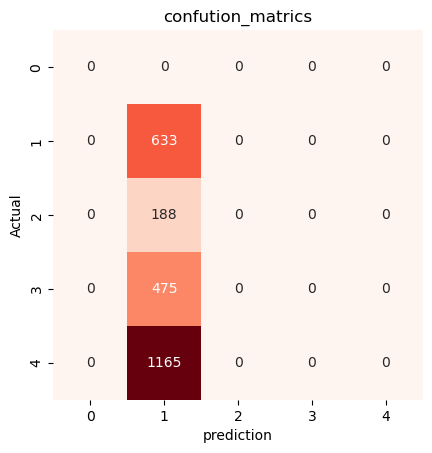

In [139]:
conf_matrixs(y_test_p,model_xp,x_test_p,cmap='Reds',plot=True,encoded_labels=True)

# LogisticRegression

In [140]:
model_l = LogisticRegression(solver='lbfgs',max_iter=1000)


In [141]:
model_l.fit(x_train,y_train)


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [142]:
evaluvation_matrics("p_reduced",model_l,"SVM",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.55      0.17      0.26      2566
      1_star       1.00      0.00      0.00       767
      3_star       1.00      0.00      0.00      1895
      2_star       1.00      0.00      0.00      4321

   micro avg       0.55      0.05      0.08      9549
   macro avg       0.91      0.23      0.25      9549
weighted avg       0.88      0.05      0.07      9549

accuracy_score= 59.15057232509834


array([[  0,   0,   0,   0,   0],
       [  0, 436,   0,   0,   0],
       [  0,  72,   0,   0,   0],
       [  0,  81,   0,   0,   0],
       [  0,  79,   0,   0,   0]], dtype=int64)

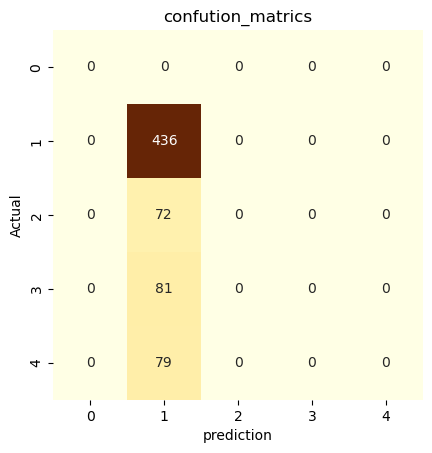

In [143]:
conf_matrixs(y_test,model_l,x_test,cmap='YlOrBr',plot=True,encoded_labels=True)

In [144]:
model_lp =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_lp.fit(x_train_p,y_train_p)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [145]:
evaluvation_matrics("p_reduced",model_l,"SVM",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.55      0.17      0.26      2566
      1_star       1.00      0.00      0.00       767
      3_star       1.00      0.00      0.00      1895
      2_star       1.00      0.00      0.00      4321

   micro avg       0.55      0.05      0.08      9549
   macro avg       0.91      0.23      0.25      9549
weighted avg       0.88      0.05      0.07      9549

accuracy_score= 59.15057232509834


In [146]:
model_lx =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_lx.fit(x_train_x,y_train_x)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [147]:
evaluvation_matrics("p_reduced",model_lx,"SVM",x_test_x,y_test_x)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.64      0.81      0.72      2566
      1_star       1.00      0.00      0.00       767
      3_star       0.52      0.02      0.03      1895
      2_star       0.33      0.00      0.00      4321

   micro avg       0.64      0.22      0.33      9549
   macro avg       0.70      0.37      0.35      9549
weighted avg       0.51      0.22      0.20      9549

accuracy_score= 66.71233482123127


# Naive_Bayes

In [148]:
model_g = GaussianNB()
model_g.fit(x_train,y_train)
evaluvation_matrics("clean_dc",model_g,"SVM",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.47      0.26      0.34      2566
      1_star       0.00      0.00      1.00       767
      3_star       0.17      0.05      0.07      1895
      2_star       0.26      0.05      0.08      4321

   micro avg       0.35      0.10      0.16      9549
   macro avg       0.38      0.27      0.50      9549
weighted avg       0.28      0.10      0.22      9549

accuracy_score= 57.96172714014231


In [149]:
model_gp = GaussianNB()
model_gp.fit(x_train_p,y_train_p)
evaluvation_matrics("PcA",model_gp,"SVM",x_test_p,y_test_p)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.44      0.24      0.31      2566
      1_star       1.00      0.00      0.00       767
      3_star       1.00      0.00      0.00      1895
      2_star       0.24      0.00      0.00      4321

   micro avg       0.43      0.06      0.11      9549
   macro avg       0.74      0.25      0.26      9549
weighted avg       0.51      0.06      0.08      9549

accuracy_score= 59.02682635789102


In [150]:
model_gx = GaussianNB()
model_gx.fit(x_train_x,y_train_x)
evaluvation_matrics("x_reduced",model_gx,"SVM",x_test_x,y_test_x)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.46      0.44      0.45      2566
      1_star       0.14      0.07      0.09       767
      3_star       0.19      0.18      0.19      1895
      2_star       0.40      0.20      0.26      4321

   micro avg       0.35      0.25      0.29      9549
   macro avg       0.44      0.38      0.40      9549
weighted avg       0.35      0.25      0.28      9549

accuracy_score= 61.52826269501038


# AdaBoostClassifier

In [151]:
model_a = AdaBoostClassifier(estimator=model_d)
model_a.fit(x_train,y_train)
evaluvation_matrics("clean",model_a,"adabooster",x_test,y_test)

              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.95      0.90      0.92      2566
      1_star       0.97      0.75      0.85       767
      3_star       0.89      0.52      0.65      1895
      2_star       0.74      0.47      0.57      4321

   micro avg       0.86      0.61      0.72      9549
   macro avg       0.91      0.73      0.80      9549
weighted avg       0.84      0.61      0.70      9549

accuracy_score= 80.88124806646925


array([[   0,    0,    0,    0,    0],
       [   0, 2304,    5,   22,   38],
       [   0,   30,  576,    8,   24],
       [   0,   30,    1,  980,  109],
       [   0,   25,    4,   27, 2011]], dtype=int64)

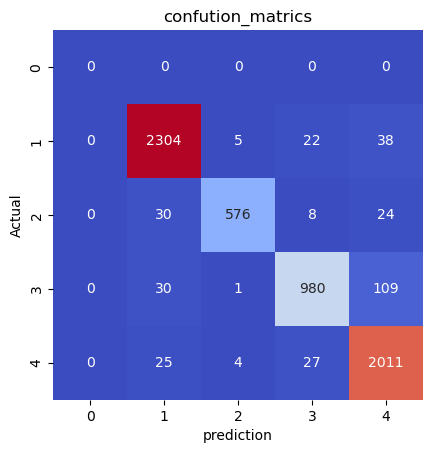

In [152]:
conf_matrixs(y_test,model_a,x_test,cmap='coolwarm',plot=True,encoded_labels=True)

In [153]:
model_ap = AdaBoostClassifier(estimator=model_dp)
model_ap.fit(x_train_p,y_train_p)
evaluvation_matrics("PCA",model_ap,"adabooster",x_test_p,y_test_p)


              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.54      0.49      0.52      2566
      1_star       0.42      0.32      0.36       767
      3_star       0.34      0.27      0.30      1895
      2_star       0.37      0.33      0.34      4321

   micro avg       0.41      0.36      0.38      9549
   macro avg       0.53      0.48      0.50      9549
weighted avg       0.41      0.36      0.38      9549

accuracy_score= 58.8633049012242


array([[   0,    0,    0,    0,    0],
       [   0, 1266,   53,  141,  268],
       [   0,   82,  242,   44,   86],
       [   0,  128,   37,  504,  272],
       [   0,  246,   72,  225, 1406]], dtype=int64)

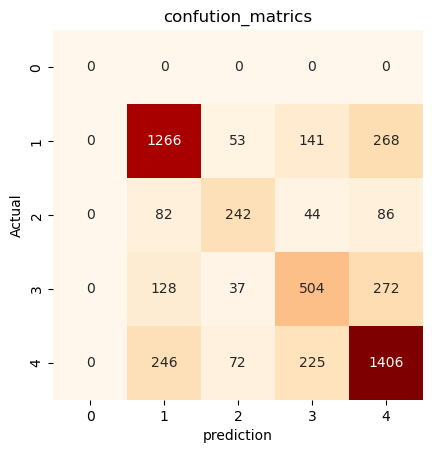

In [154]:
conf_matrixs(y_test_p,model_ap,x_test_p,cmap='OrRd',plot=True,encoded_labels=True)

In [156]:
model_ax = AdaBoostClassifier(estimator=model_dx)
model_ax.fit(x_train_x,y_train_x)
evaluvation_matrics("reduced_x",model_ax,"adabooster",x_test_x,y_test_x)


              precision    recall  f1-score   support

      5_star       1.00      1.00      1.00         0
      4_star       0.88      0.89      0.88      2566
      1_star       0.73      0.76      0.74       767
      3_star       0.55      0.56      0.56      1895
      2_star       0.54      0.54      0.54      4321

   micro avg       0.65      0.66      0.65      9549
   macro avg       0.74      0.75      0.74      9549
weighted avg       0.65      0.66      0.65      9549

accuracy_score= 74.33155080213903


array([[   0,    0,    0,    0,    0],
       [   0, 2276,   32,   47,   68],
       [   0,   28,  580,   31,   46],
       [   0,   44,   25, 1064,  242],
       [   0,   76,   41,  236, 2347]], dtype=int64)

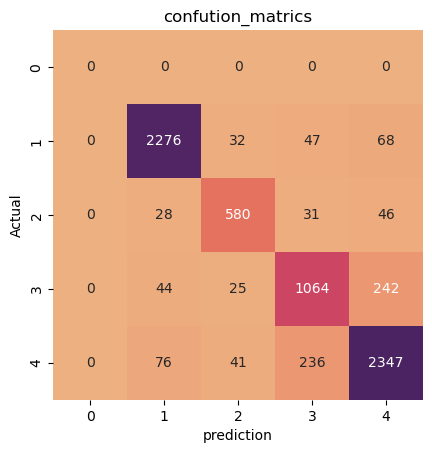

In [157]:
conf_matrixs(y_test_x,model_ax,x_test_x,cmap='flare',plot=True,encoded_labels=True)

#  MultinomialNB